Air BNB LOS ANGELES
====

# Variables del DataFrame

Pendiente...
- 

# Importamos librerías

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxp
import plotly as px
from scipy import stats

# Lectura de los datos y ajustes iniciales

## Leemos el csv

In [2]:
LA = pd.read_csv('listings.csv')
for col in LA.select_dtypes(include=['object']).columns:
    LA[col] = LA[col].str.replace("\n", " ",regex=False) # reemplazamos cambios de línea por espacios

## Escogemos los datos con los que vamos a trabajar

Leemos el archivo `listings.csv.gz` de la [url de AirBNB](https://data.insideairbnb.com/united-states/ca/los-angeles/2024-03-11/data/listings.csv.gz) sin descargarlo porque pesa más de 100 MB y no se permite subirlo a GitHub.

De esta manera, podemos seguir trabajando con el .csv.gz sin tenerlo descargado de manera local y pudiendo hacer commits online.

### Introducimos algunos datos de `listings.csv.gz` a nuestro csv principal `listings.csv`

In [3]:
# Leer los archivos CSV
URL = r"https://data.insideairbnb.com/united-states/ca/los-angeles/2024-03-11/data/listings.csv.gz"

LAgz = pd.read_csv(URL, compression='gzip')

# Seleccionar solo las columnas necesarias de LAgz
LAgz_selected = LAgz[['id', 'bathrooms', 'amenities', 'bedrooms', 'beds', "accommodates", "first_review", "review_scores_rating"]]

# Realizar el merge basado en la columna 'id'
LA_merged = pd.merge(LA, LAgz_selected, on='id', how='left')

# Mostrar el DataFrame resultante
LA_merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,number_of_reviews_ltm,license,bathrooms,amenities,bedrooms,beds,accommodates,first_review,review_scores_rating
0,969148637126091185,Rancho Aguirre,534598147,Ferdy,Unincorporated Areas,Lake Los Angeles,34.628008,-117.846299,Private room,160.0,...,269,0,NaN,1.0,"[""Hot tub"", ""Kitchen"", ""Wifi"", ""Smoke alarm"", ...",1.0,1.0,2,NaN,NaN
1,1084360946145463169,Huge guest house private room,82025876,Shou,Other Cities,Torrance,33.816549,-118.315387,Private room,75.0,...,269,0,NaN,1.0,"[""Fire extinguisher"", ""Dedicated workspace"", ""...",1.0,2.0,3,NaN,NaN
2,596292401172099914,The Big Kahuna,7858796,Pamela,Other Cities,Malibu,34.045480,-118.622410,Entire home/apt,2000.0,...,364,0,NaN,3.0,"[""Hot tub"", ""Fire extinguisher"", ""Dedicated wo...",3.0,4.0,6,NaN,NaN
3,986988052370510312,private home in pacoima,23634612,Mario,City of Los Angeles,Pacoima,34.256305,-118.430663,Entire home/apt,124.0,...,269,0,Exempt - This listing is a transient occupancy...,1.0,"[""Kitchen"", ""Pool table"", ""Wifi"", ""Carbon mono...",1.0,1.0,3,NaN,NaN
4,750761099803796354,Luxe Beachfront Living | Hot Tub | Stunning View,41223310,Luxe Home,Other Cities,Malibu,34.037971,-118.650749,Entire home/apt,4200.0,...,364,0,STR22-0058,4.0,"[""Dining table"", ""Cleaning products"", ""Cooking...",4.0,6.0,10,2022-12-19,5.0


In [4]:
df = LA_merged.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45570 non-null  int64  
 1   name                            45569 non-null  object 
 2   host_id                         45570 non-null  int64  
 3   host_name                       45568 non-null  object 
 4   neighbourhood_group             45570 non-null  object 
 5   neighbourhood                   45570 non-null  object 
 6   latitude                        45570 non-null  float64
 7   longitude                       45570 non-null  float64
 8   room_type                       45570 non-null  object 
 9   price                           37312 non-null  float64
 10  minimum_nights                  45570 non-null  int64  
 11  number_of_reviews               45570 non-null  int64  
 12  last_review                     

## Creamos variables propias

### Número total de servicios adicionales

Añadimos una columna con el total de Amenities (servicios adicionales)

In [6]:
# Paso 1: Dividir la cadena de texto en listas
df['amenities_count'] = df['amenities'].str.split(',').apply(len)

# Ahora, df['amenities_count'] contiene la cantidad de amenities por fila
df[['amenities', 'amenities_count']]

,amenities,amenities_count
0,"[""Hot tub"", ""Kitchen"", ""Wifi"", ""Smoke alarm"", ...",7
1,"[""Fire extinguisher"", ""Dedicated workspace"", ""...",11
2,"[""Hot tub"", ""Fire extinguisher"", ""Dedicated wo...",16
3,"[""Kitchen"", ""Pool table"", ""Wifi"", ""Carbon mono...",8
4,"[""Dining table"", ""Cleaning products"", ""Cooking...",57
...,...,...
45565,"[""Technics sound system with Bluetooth and aux...",68
45566,"[""Self check-in"", ""Mini golf"", ""Dining table"",...",81
45567,"[""Self check-in"", ""Oven"", ""Cooking basics"", ""F...",40
45568,"[""Self check-in"", ""Dining table"", ""Cleaning pr...",78


Añadimos una columna nueva que indica "True" si se permiten mascotas y "False" en caso contrario. Obtenido buscando el string "pet" y "pets" en `amenities`

In [7]:
def check_pet(row):
    if 'pet' in row['amenities'].lower() or 'pets' in row['amenities'].lower():
        return True
    else:
        return False

# Aplicar la función a cada fila y crear la nueva columna 'has_pet'
df['has_pet'] = df.apply(lambda row: check_pet(row), axis=1)

Lo mismo, si tienen o no cámaras de seguridad

In [8]:
def check_security_cameras(row):
    if 'security cameras on property' in row['amenities'].lower():
        return True
    else:
        return False

# Aplicar la función a cada fila y crear la nueva columna 'has_pet'
df['has_security_cams'] = df.apply(lambda row: check_security_cameras(row), axis=1)

### Antigüedad aproximada de la casa

Vamos a usar la fecha de la primera review como un *proxy* de la edad de la casa. No tiene por qué coincidir con la edad real pero es una aproximación inicial que nos podría servir.

In [9]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce') # Convierte nulos en Not a Time

# Obtenemos la fecha actual
fecha_actual = pd.Timestamp.now()

# Calculamos la antigüedad en años con decimales
df['antiguedad'] = round((fecha_actual - df['first_review']).dt.total_seconds() / (365.25 * 24 * 60 * 60),1) 
# Creamos variable de antigüedad teniendo en cuenta la posibilidad de años bisiestos y redondeando a 1 decimal
df['antiguedad_ex'] = (fecha_actual - df['first_review']).dt.total_seconds() // (365.25 * 24 * 60 * 60)
# Redondeando hacia abajo, obtenemos estrictamente los años enteros

df[['first_review', 'antiguedad', "antiguedad_ex"]].head(10)

,first_review,antiguedad,antiguedad_ex
0,NaT,NaN,NaN
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2022-12-19,1.5,1.0
5,2023-04-02,1.2,1.0
6,2023-01-03,1.5,1.0
7,2022-10-21,1.7,1.0
8,2019-04-21,5.2,5.0
9,2023-07-30,0.9,0.0


### Renombrar la columna `calculated_host_listing_count`

Para que el nombre sea más manejable

In [10]:
df.rename(columns={'calculated_host_listings_count': 'host_count'}, inplace=True)

# Limpieza general de los datos

## Arreglar Fechas

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  object        
 13  r

### Last review

Vamos a ver qué podemos hacer con last review, porque es una fecha string en formato YYYY/MM/DD

In [12]:
# Convertimos la columna "last_review" a formate datetime con pandas
df['last_review'] = pd.to_datetime(df['last_review'])

# Convertimos la fecha en formato MM/DD/YYYY
df['last_review'] = df['last_review'].dt.strftime('%m/%d/%Y')

# Así tenemos la columna last_review en formato MM/DD/YYYY y tipo de dato string
# Convertimos la columna "last_review" a formate datetime con pandas

df['last_review'] = pd.to_datetime(df['last_review'])

Ya hemos arrreglado la Fecha, ahora está en formato americano (MM/DD/YYYY) y en formato fecha (datetime64[ns])

## Datos Nulos

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [14]:
df.isnull().sum()

id                           0
name                         1
host_id                      0
host_name                    2
neighbourhood_group          0
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
price                     8258
minimum_nights               0
number_of_reviews            0
last_review              12611
reviews_per_month        12611
host_count                   0
availability_365             0
number_of_reviews_ltm        0
license                  32989
bathrooms                 8264
amenities                    0
bedrooms                  3143
beds                      8420
accommodates                 0
first_review             12611
review_scores_rating     12597
amenities_count              0
has_pet                      0
has_security_cams            0
antiguedad               12611
antiguedad_ex            12611
dtype: int64

In [15]:
df.isnull().sum()/len(df)*100

id                        0.000000
name                      0.002194
host_id                   0.000000
host_name                 0.004389
neighbourhood_group       0.000000
neighbourhood             0.000000
latitude                  0.000000
longitude                 0.000000
room_type                 0.000000
price                    18.121571
minimum_nights            0.000000
number_of_reviews         0.000000
last_review              27.673908
reviews_per_month        27.673908
host_count                0.000000
availability_365          0.000000
number_of_reviews_ltm     0.000000
license                  72.391925
bathrooms                18.134738
amenities                 0.000000
bedrooms                  6.897081
beds                     18.477068
accommodates              0.000000
first_review             27.673908
review_scores_rating     27.643186
amenities_count           0.000000
has_pet                   0.000000
has_security_cams         0.000000
antiguedad          

- `name` y `host_name`: Dropear simplemente
- `price`: utilizar un algoritmo KNN o una regresión para utilizar el 82% de los datos, los existentes, para rellenar el 18% restante
- `last_review`, `reviews_per_month`, `first_review`, `review_scores_rating`, `antiguedad` y `antiguedad_ex`: No disponemos de todos los datos relacionados con las fechas y las votaciones, explorar los datos de los que disponemos (`antiguedad` y `antiguedad_ex` derivan de `first_review`, por lo que tienen la misma cantidad de datos nulos)
- `license`: o bien no usarla o buscar algun detalle que dé que pueda ser útil
- `bedrooms`, `bahtrooms` y `beds`: se podrían completar usando un KNN o una regresión pero al no ser una variable tan vital para el análisis, podría dejarse por la media o mediana.

En resumen:
1. [x] DROPEAR: `NAME Y HOST NAME`
1. [x] COMPLETAR: `PRICE`
1. [X] NO ALTERAR: `LAST REVIEW, REVIEWS PER MONTH, FIRST REVIEW, REVIEW SCORES RATING, ANTIGUEDAD, ANTIGUEDAD_EX`
1. [x] CREAR CATEGORÍA DE NO LICENCIA: `LICENSE`
1. [x] CAMBIAR POR MODA/MEDIANA: `BEDROOMS`, `BATHROOMS`, `BEDS`

<Axes: >

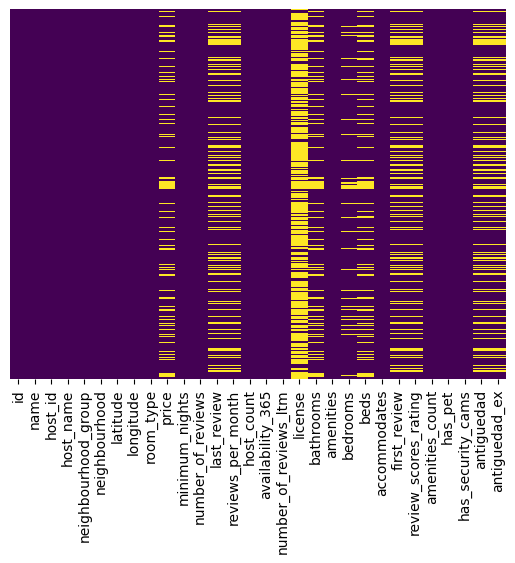

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### `Price`

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [18]:
df["price"].describe()

count    37312.000000
mean       301.985688
std       1098.958186
min          5.000000
25%         99.000000
50%        156.000000
75%        268.000000
max      99999.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

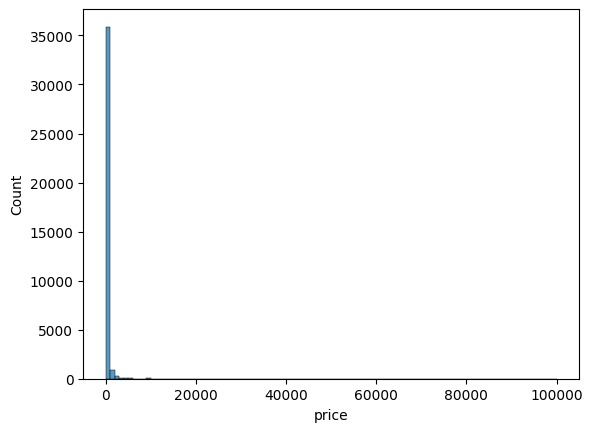

In [19]:
sns.histplot(data=df['price'], bins=100)

In [20]:
price_under_1000 = df[df['price'] <= 1000]

In [21]:
price_under_1000["price"].describe()

count    35881.000000
mean       204.366099
std        170.036183
min          5.000000
25%         98.000000
50%        150.000000
75%        250.000000
max       1000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

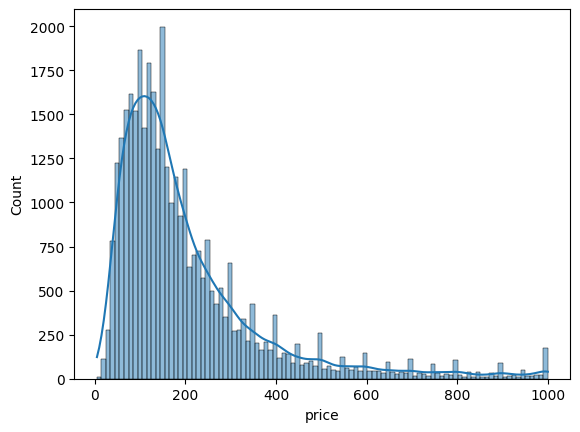

In [22]:
sns.histplot(data = price_under_1000["price"], bins=100, kde=True)

#### KNN con encoder manual y k=215

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  37312 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Creamos copia para la variables escaladas
df_scaled = df.copy()

# Estas son las columnas que se van a usar como predictores de Price
columnas=['neighbourhood_group', 'room_type', "accommodates", 
        "amenities_count", "has_pet", "latitude", "longitude"]
df_scaled = df_scaled[columnas + ['price']]

"""
Significado variables:
neighbourhood_group: región del condado de california (encodear a mano)
room_type: tipo de habitación (encodear a mano)
latitud 
longitud
accomodates: inquilinos máximos
amenities_count: cantidad de servicios adicionales
has_pet: si acepta mascotas (si uno de los servicios adicionales es "pet")
"""

# Encodeamos las variables categóricas
room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3}
df_scaled['room_type'] = df_scaled['room_type'].map(room_type_dict)
# Criterio: de más privacidad a menos privacidad

neighbourhood_group_dict ={'City of Los Angeles':0, 'Other Cities':1, 'Unincorporated Areas':2}
df_scaled['neighbourhood_group'] = df_scaled['neighbourhood_group'].map(neighbourhood_group_dict)
# Criterio: de las zonas más urbanas a la más rurales

# Vamos a normalizar todas las variables que vamos a usar como predictores de Price
scaler = StandardScaler()
df_scaled[columnas] = scaler.fit_transform(df_scaled[columnas]) # Fit transform SOBRE EL ENTRENAMIENTO

# Creamos dos dataframes basados en la presencia o ausencia de Price
df_with_price = df_scaled.dropna(subset=['price'])
df_without_price = df_scaled[df_scaled['price'].isna()].drop(columns='price')

# Usamor la raiz de N como valor de K
modelo = KNeighborsRegressor(n_neighbors=215) 

# Entrenamos el modelo
modelo.fit(df_with_price.drop(['price'], axis=1), df_with_price['price'])

# Predecimos los valores de Price
predictions = modelo.predict(df_without_price)

# Imputamos los valores predichos de price en el dataframe df_price_knn
df_price_knn = df_scaled.copy()
df_price_knn.loc[df_price_knn['price'].isna(), 'price'] = predictions

In [25]:
df_scaled[269:279]

,neighbourhood_group,room_type,accommodates,amenities_count,has_pet,latitude,longitude,price
269,0.614569,1.446810,-0.357168,-1.507929,-0.720311,0.719665,-0.132075,NaN
270,0.614569,-0.563224,-0.357168,-1.297237,1.388289,0.026890,-0.414980,170.0
271,2.142276,-0.563224,0.689754,1.652452,1.388289,0.264732,-1.634125,NaN
272,-0.913137,-0.563224,-0.008194,-0.770507,-0.720311,-0.075991,0.305305,NaN
273,-0.913137,-0.563224,-0.008194,-1.139218,-0.720311,-0.435779,-0.844268,239.0
274,0.614569,1.446810,-0.706142,-1.507929,-0.720311,-0.302325,0.506102,89.0
275,0.614569,-0.563224,-0.706142,-1.297237,1.388289,0.025029,-0.413470,150.0
276,0.614569,-0.563224,-0.008194,0.651665,-0.720311,0.899187,-0.148506,134.0
277,-0.913137,-0.563224,-0.008194,-0.928526,-0.720311,-0.415451,-0.947684,180.0
278,-0.913137,-0.563224,-0.706142,-1.139218,-0.720311,0.973893,-1.621115,NaN


In [26]:
df_price_knn[269:279]

,neighbourhood_group,room_type,accommodates,amenities_count,has_pet,latitude,longitude,price
269,0.614569,1.446810,-0.357168,-1.507929,-0.720311,0.719665,-0.132075,611.195349
270,0.614569,-0.563224,-0.357168,-1.297237,1.388289,0.026890,-0.414980,170.000000
271,2.142276,-0.563224,0.689754,1.652452,1.388289,0.264732,-1.634125,444.283721
272,-0.913137,-0.563224,-0.008194,-0.770507,-0.720311,-0.075991,0.305305,184.613953
273,-0.913137,-0.563224,-0.008194,-1.139218,-0.720311,-0.435779,-0.844268,239.000000
274,0.614569,1.446810,-0.706142,-1.507929,-0.720311,-0.302325,0.506102,89.000000
275,0.614569,-0.563224,-0.706142,-1.297237,1.388289,0.025029,-0.413470,150.000000
276,0.614569,-0.563224,-0.008194,0.651665,-0.720311,0.899187,-0.148506,134.000000
277,-0.913137,-0.563224,-0.008194,-0.928526,-0.720311,-0.415451,-0.947684,180.000000
278,-0.913137,-0.563224,-0.706142,-1.139218,-0.720311,0.973893,-1.621115,155.800000


In [27]:
df["price"] = df_price_knn["price"]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45570 entries, 0 to 45569
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45570 non-null  int64         
 1   name                   45569 non-null  object        
 2   host_id                45570 non-null  int64         
 3   host_name              45568 non-null  object        
 4   neighbourhood_group    45570 non-null  object        
 5   neighbourhood          45570 non-null  object        
 6   latitude               45570 non-null  float64       
 7   longitude              45570 non-null  float64       
 8   room_type              45570 non-null  object        
 9   price                  45570 non-null  float64       
 10  minimum_nights         45570 non-null  int64         
 11  number_of_reviews      45570 non-null  int64         
 12  last_review            32959 non-null  datetime64[ns]
 13  r

In [29]:
df["price"].describe()

count    45570.000000
mean       288.728948
std       1000.331356
min          5.000000
25%        100.000000
50%        156.000000
75%        260.000000
max      99999.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

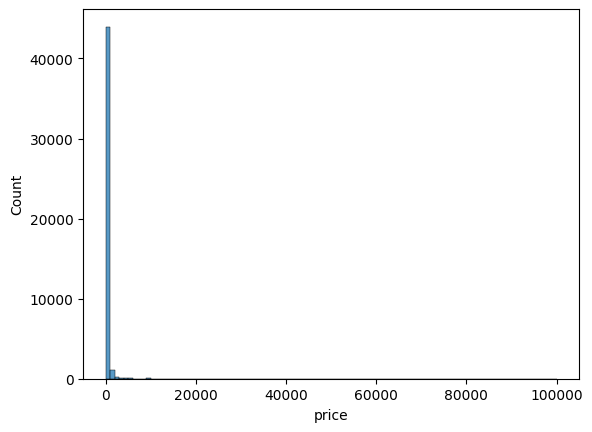

In [30]:
sns.histplot(data=df['price'], bins=100)

In [31]:
price_under_1000_KNN = df[df['price'] <= 1000]

In [32]:
price_under_1000_KNN["price"].describe()

count    43961.000000
mean       203.896637
std        167.804169
min          5.000000
25%         99.000000
50%        151.000000
75%        246.000000
max       1000.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

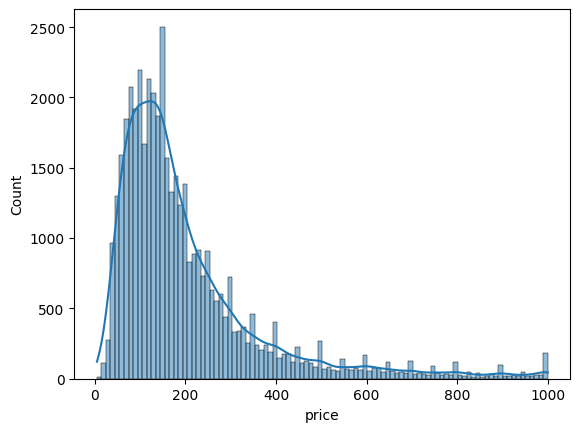

In [33]:
sns.histplot(data = price_under_1000_KNN["price"], bins=100, kde=True)

### Dropeo de `Name` y `Host Name`

In [34]:
df.dropna(subset=['name', 'host_name'], inplace=True) # quitamos los 3 nulos

### Ajustes en `Bathrooms`, `Bedrooms` y `Beds`

In [35]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'bathrooms', 'amenities',
       'bedrooms', 'beds', 'accommodates', 'first_review',
       'review_scores_rating', 'amenities_count', 'has_pet',
       'has_security_cams', 'antiguedad', 'antiguedad_ex'],
      dtype='object')

#### Bathrooms

In [36]:
df['bathrooms'] = np.ceil(df['bathrooms'])

In [37]:
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].mode().values[0])

<Axes: xlabel='bathrooms', ylabel='Count'>

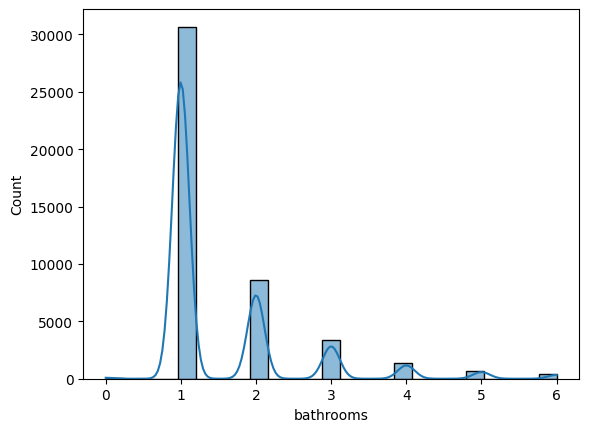

In [38]:
baños = df[df["bathrooms"]<=6]
sns.histplot(data=baños["bathrooms"], bins=25,kde=True)

In [39]:
df["bathrooms"] = df["bathrooms"].astype("int64")

#### Bedrooms

<Axes: xlabel='bedrooms', ylabel='Count'>

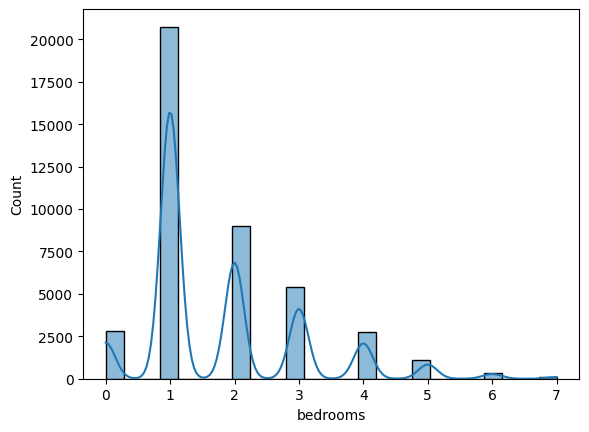

In [40]:
cuartos = df[df["bedrooms"]<=7]
sns.histplot(data=cuartos, x="bedrooms", bins=25,kde=True)

In [41]:
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].mode().values[0])

<Axes: xlabel='bedrooms', ylabel='Count'>

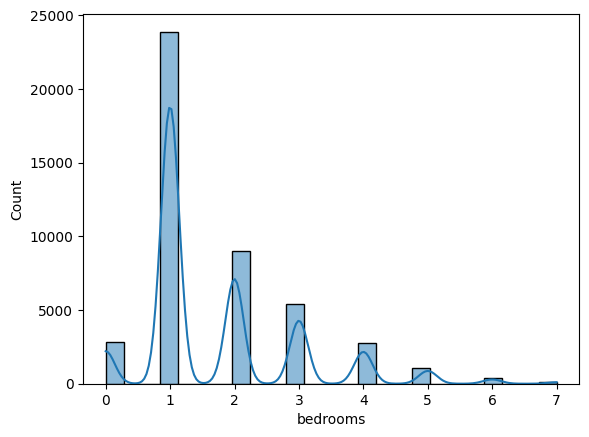

In [42]:
cuartos = df[df["bedrooms"]<=7]
sns.histplot(data=cuartos, x="bedrooms", bins=25,kde=True)

In [43]:
df["bedrooms"] = df["bedrooms"].astype("int64")

#### Beds

<Axes: xlabel='beds', ylabel='Count'>

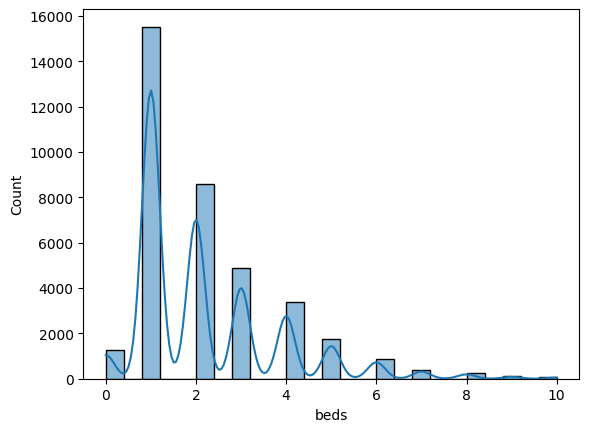

In [44]:
camas = df[df["beds"]<=10]
sns.histplot(data=camas["beds"], bins=25,kde=True)

In [45]:
df["beds"] = df["beds"].fillna(df["beds"].median())

<Axes: xlabel='beds', ylabel='Count'>

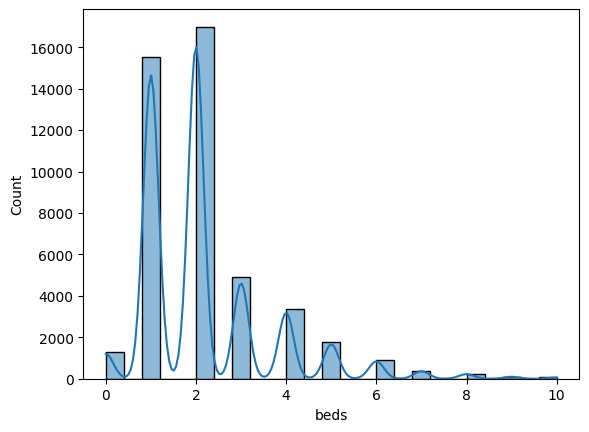

In [46]:
camas = df[df["beds"]<=10]
sns.histplot(data=camas["beds"], bins=25,kde=True)

In [47]:
df["beds"] = df["beds"].astype("int64")

### Licencia

In [48]:
df["license"].value_counts()

license
Exempt                                                                  1219
Exempt - This listing is a transient occupancy residential structure     850
Exempt - This listing is a hotel or motel                                748
Exempt - This listing is a bed and breakfast                             521
HSR19-004485                                                              26
                                                                        ... 
HSR24-000103                                                               1
HSR23-002513                                                               1
HSR23-003290                                                               1
HSR21-001463                                                               1
HSR19-004909                                                               1
Name: count, Length: 7449, dtype: int64

In [49]:
df["license"].fillna("Unlicensed", inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\1723035800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["license"].fillna("Unlicensed", inplace=True)


In [50]:
df["license"].value_counts()

license
Unlicensed                                                              32986
Exempt                                                                   1219
Exempt - This listing is a transient occupancy residential structure      850
Exempt - This listing is a hotel or motel                                 748
Exempt - This listing is a bed and breakfast                              521
                                                                        ...  
HSR24-000103                                                                1
HSR23-002513                                                                1
HSR23-003290                                                                1
HSR21-001463                                                                1
HSR19-004909                                                                1
Name: count, Length: 7450, dtype: int64

## Casas no disponibles

In [51]:
# Lista de valores de 'id' sin disponibilidad
ids_to_drop = [18598748, 39699546, 19552571, 31695262, 48406230, 16452452, 19769097,3283551, 28363598, 18920210]

df = df[~df['id'].isin(ids_to_drop)]

## Comparación final de Nulos

Algunas casas explicitan en su columna name que no están disponibles, así que vamos a eliminarlas también manualmente

<Axes: >

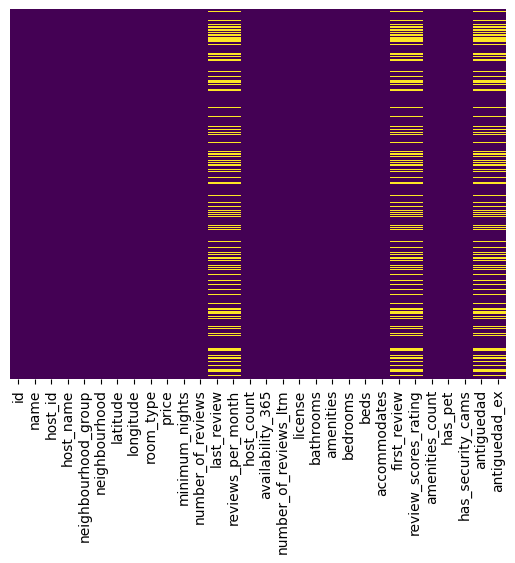

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
df.isnull().sum()/len(df)*100

id                        0.000000
name                      0.000000
host_id                   0.000000
host_name                 0.000000
neighbourhood_group       0.000000
neighbourhood             0.000000
latitude                  0.000000
longitude                 0.000000
room_type                 0.000000
price                     0.000000
minimum_nights            0.000000
number_of_reviews         0.000000
last_review              27.664245
reviews_per_month        27.664245
host_count                0.000000
availability_365          0.000000
number_of_reviews_ltm     0.000000
license                   0.000000
bathrooms                 0.000000
amenities                 0.000000
bedrooms                  0.000000
beds                      0.000000
accommodates              0.000000
first_review             27.664245
review_scores_rating     27.633514
amenities_count           0.000000
has_pet                   0.000000
has_security_cams         0.000000
antiguedad          

# Detección de valores atípicos

Columna 1: 'id'. Los valores entre el primer cuartil 31243810.0 y el tercer cuartil 9.037650144807547e+17 componen el rango intercuartílico, que es de tamaño 9.037650144495109e+17
Los valores extremadamente atípicos están por debajo de -2.711295043317289e+18 y por encima de 3.6150600578292874e+18, y en esta columna hay un total de 0 datos atípicos.



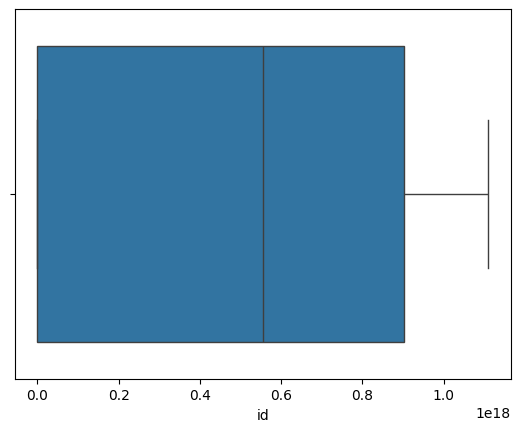

Columna 2: 'host_id'. Los valores entre el primer cuartil 26019462.0 y el tercer cuartil 349564712.0 componen el rango intercuartílico, que es de tamaño 323545250.0
Los valores extremadamente atípicos están por debajo de -944616288.0 y por encima de 1320200462.0, y en esta columna hay un total de 0 datos atípicos.



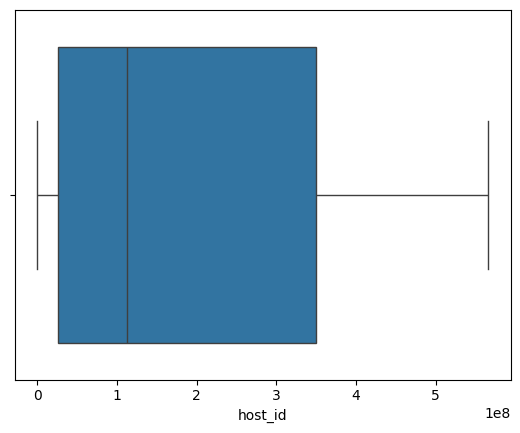

Columna 3: 'latitude'. Los valores entre el primer cuartil 33.99856 y el tercer cuartil 34.10789 componen el rango intercuartílico, que es de tamaño 0.1
Los valores extremadamente atípicos están por debajo de 33.7 y por encima de 34.4, y en esta columna hay un total de 1111 datos atípicos.



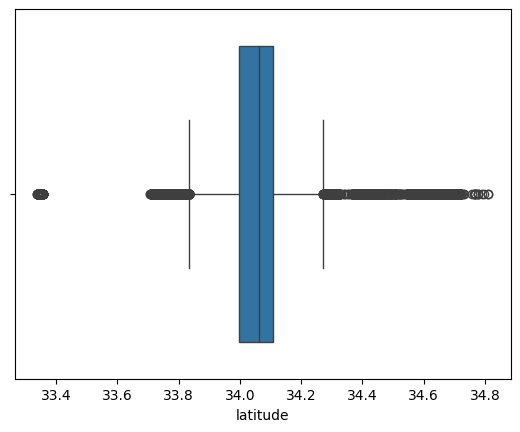

Columna 4: 'longitude'. Los valores entre el primer cuartil -118.41452524135582 y el tercer cuartil -118.23671 componen el rango intercuartílico, que es de tamaño 0.2
Los valores extremadamente atípicos están por debajo de -118.9 y por encima de -117.7, y en esta columna hay un total de 12 datos atípicos.



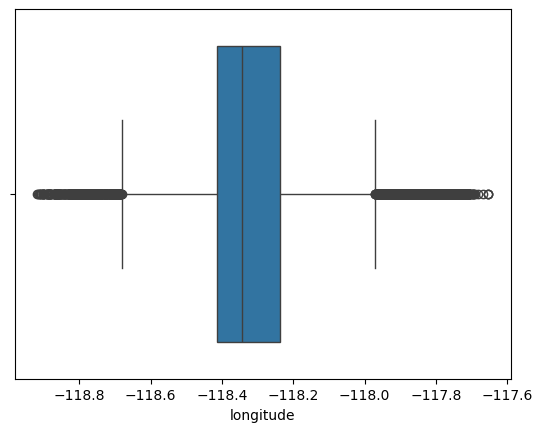

Columna 5: 'price'. Los valores entre el primer cuartil 100.0 y el tercer cuartil 260.0 componen el rango intercuartílico, que es de tamaño 160.0
Los valores extremadamente atípicos están por debajo de -380.0 y por encima de 740.0, y en esta columna hay un total de 2680 datos atípicos.



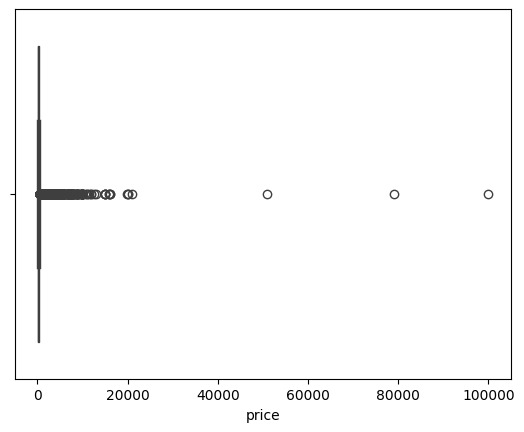

Columna 6: 'minimum_nights'. Los valores entre el primer cuartil 2.0 y el tercer cuartil 30.0 componen el rango intercuartílico, que es de tamaño 28.0
Los valores extremadamente atípicos están por debajo de -82.0 y por encima de 114.0, y en esta columna hay un total de 242 datos atípicos.



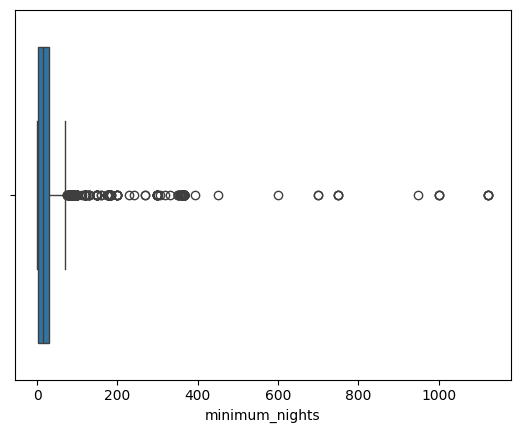

Columna 7: 'number_of_reviews'. Los valores entre el primer cuartil 0.0 y el tercer cuartil 32.0 componen el rango intercuartílico, que es de tamaño 32.0
Los valores extremadamente atípicos están por debajo de -96.0 y por encima de 128.0, y en esta columna hay un total de 3473 datos atípicos.



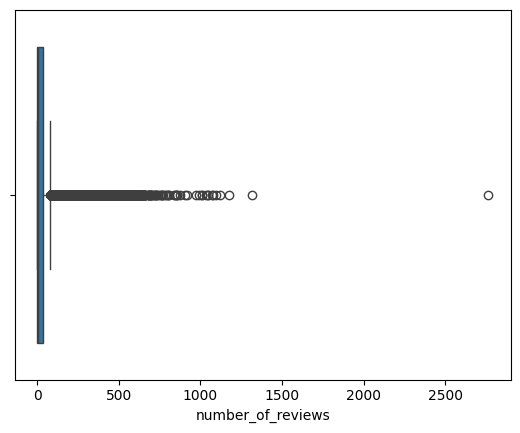

Columna 8: 'reviews_per_month'. Los valores entre el primer cuartil 0.21 y el tercer cuartil 2.1 componen el rango intercuartílico, que es de tamaño 1.9
Los valores extremadamente atípicos están por debajo de -5.5 y por encima de 7.8, y en esta columna hay un total de 219 datos atípicos.



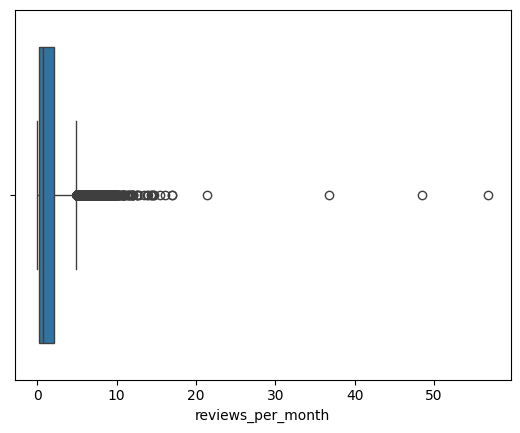

Columna 9: 'host_count'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 10.0 componen el rango intercuartílico, que es de tamaño 9.0
Los valores extremadamente atípicos están por debajo de -26.0 y por encima de 37.0, y en esta columna hay un total de 5301 datos atípicos.



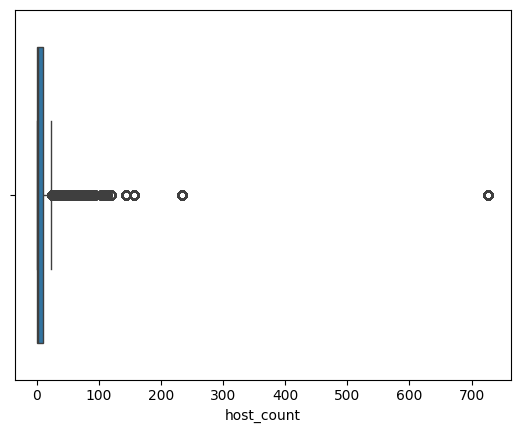

Columna 10: 'availability_365'. Los valores entre el primer cuartil 29.0 y el tercer cuartil 319.0 componen el rango intercuartílico, que es de tamaño 290.0
Los valores extremadamente atípicos están por debajo de -841.0 y por encima de 1189.0, y en esta columna hay un total de 0 datos atípicos.



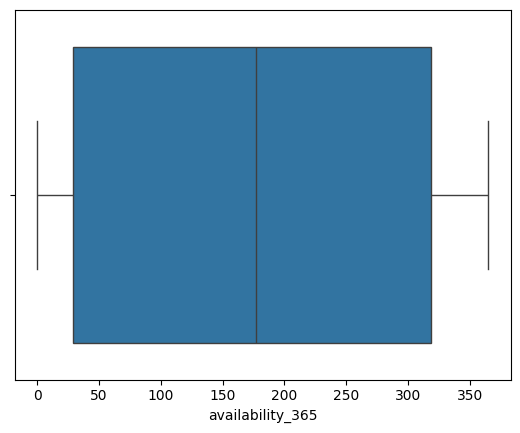

Columna 11: 'number_of_reviews_ltm'. Los valores entre el primer cuartil 0.0 y el tercer cuartil 8.0 componen el rango intercuartílico, que es de tamaño 8.0
Los valores extremadamente atípicos están por debajo de -24.0 y por encima de 32.0, y en esta columna hay un total de 4043 datos atípicos.



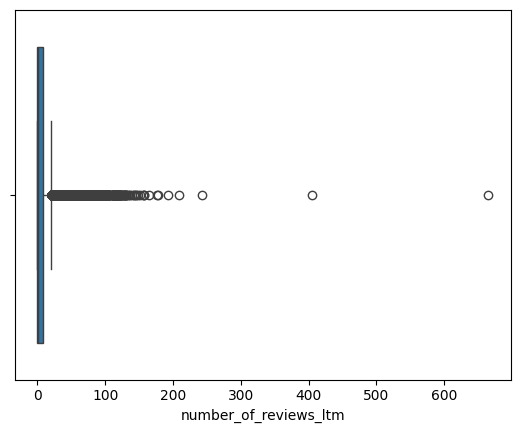

Columna 12: 'bathrooms'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 2.0 componen el rango intercuartílico, que es de tamaño 1.0
Los valores extremadamente atípicos están por debajo de -2.0 y por encima de 5.0, y en esta columna hay un total de 752 datos atípicos.



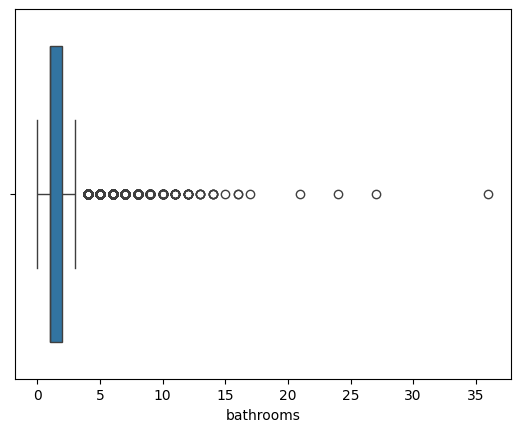

Columna 13: 'bedrooms'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 2.0 componen el rango intercuartílico, que es de tamaño 1.0
Los valores extremadamente atípicos están por debajo de -2.0 y por encima de 5.0, y en esta columna hay un total de 612 datos atípicos.



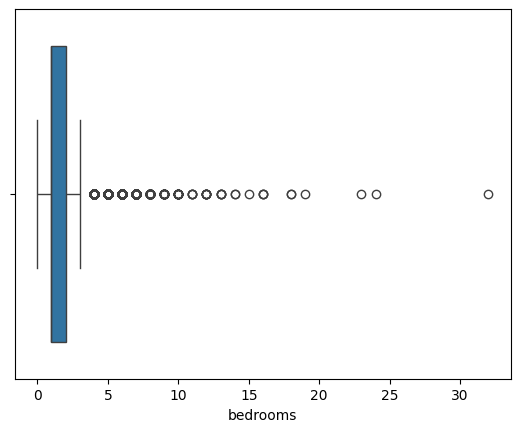

Columna 14: 'beds'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 3.0 componen el rango intercuartílico, que es de tamaño 2.0
Los valores extremadamente atípicos están por debajo de -5.0 y por encima de 9.0, y en esta columna hay un total de 176 datos atípicos.



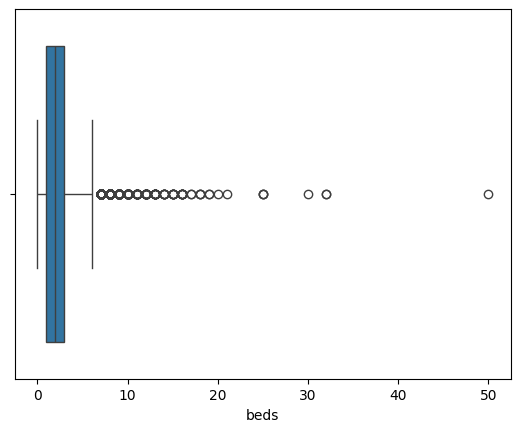

Columna 15: 'accommodates'. Los valores entre el primer cuartil 2.0 y el tercer cuartil 6.0 componen el rango intercuartílico, que es de tamaño 4.0
Los valores extremadamente atípicos están por debajo de -10.0 y por encima de 18.0, y en esta columna hay un total de 0 datos atípicos.



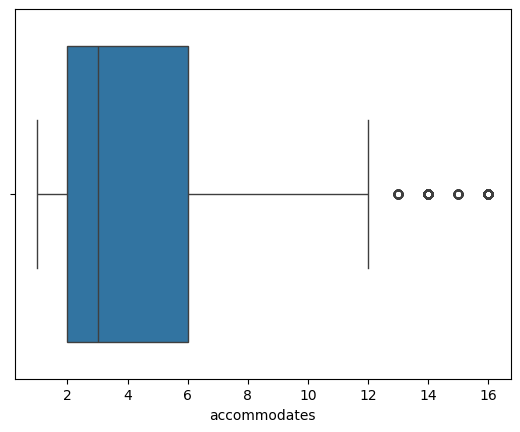

Columna 16: 'review_scores_rating'. Los valores entre el primer cuartil 4.72 y el tercer cuartil 5.0 componen el rango intercuartílico, que es de tamaño 0.3
Los valores extremadamente atípicos están por debajo de 3.9 y por encima de 5.8, y en esta columna hay un total de 1066 datos atípicos.



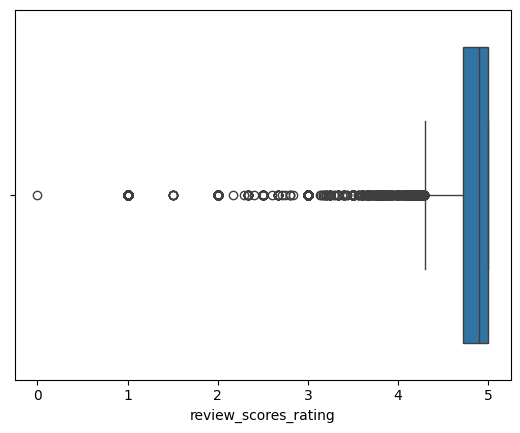

Columna 17: 'amenities_count'. Los valores entre el primer cuartil 21.0 y el tercer cuartil 50.0 componen el rango intercuartílico, que es de tamaño 29.0
Los valores extremadamente atípicos están por debajo de -66.0 y por encima de 137.0, y en esta columna hay un total de 0 datos atípicos.



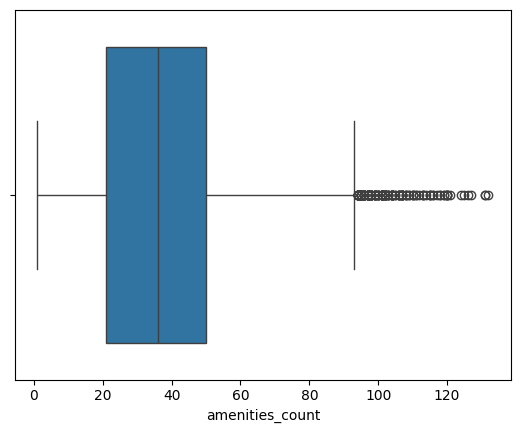

Columna 18: 'antiguedad'. Los valores entre el primer cuartil 1.1 y el tercer cuartil 5.7 componen el rango intercuartílico, que es de tamaño 4.6
Los valores extremadamente atípicos están por debajo de -12.7 y por encima de 19.5, y en esta columna hay un total de 0 datos atípicos.



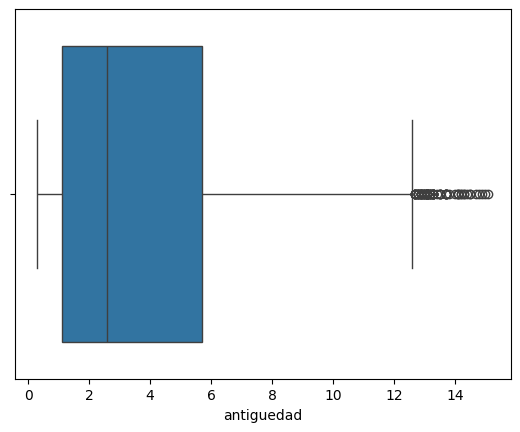

Columna 19: 'antiguedad_ex'. Los valores entre el primer cuartil 1.0 y el tercer cuartil 5.0 componen el rango intercuartílico, que es de tamaño 4.0
Los valores extremadamente atípicos están por debajo de -11.0 y por encima de 17.0, y en esta columna hay un total de 0 datos atípicos.



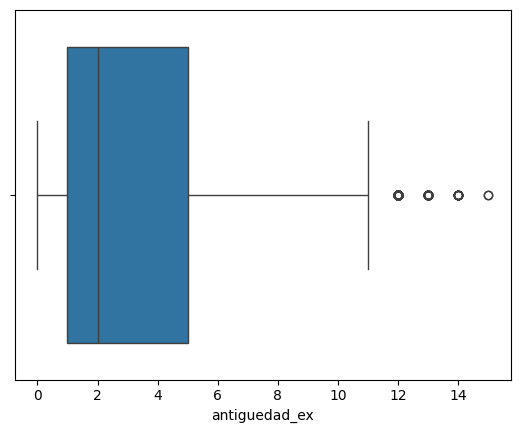

In [54]:
# Extraemos información sobre los cuartiles y los valores atípicos del dataframe
i = 0
for columna in df.columns:
    try:
        if df[columna].dtype == "int64" or df[columna].dtype == "float64": # Prestar atención al tipo de dato
            Q1 = df[columna].quantile(0.25)
            Q3 = df[columna].quantile(0.75)
            IQR = Q3 - Q1
            Inf = Q1 - 3*IQR
            Sup = Q3 + 3*IQR
            # Usamos 3*IQR para detectar valores extremadamente atípicos

            outliers = df[(df[columna] < Inf) | (df[columna] > Sup)]
            i += 1
            print(f"Columna {i}: '{columna}'. Los valores entre el primer cuartil {Q1} y el tercer cuartil {Q3} componen el rango intercuartílico, que es de tamaño {round(IQR,1)}\nLos valores extremadamente atípicos están por debajo de {round(Inf,1)} y por encima de {round(Sup,1)}, y en esta columna hay un total de {str(len(outliers))} datos atípicos.\n")
            sns.boxplot(data=df, x=columna, orient="h")
            plt.show()
        else:
            pass
    except:
        pass

### Categorización de propietarios

In [55]:
pequeños_propietarios = df[df["host_count"]==1]

In [56]:
medianos_propietarios= df[(df["host_count"]>1) & (df["host_count"]<=10)]

In [57]:
grandes_propietarios = df[df["host_count"]>10]

In [58]:
df["landlord_size"] = pd.cut(df["host_count"], bins=[0, 1, 10, 800], labels=["Small", "Medium", "Professionals"])

### Categorización de precios

Una vez identificados los outliers de los datos, podemos crear subdataframes según nos interese

Podemos dividir la muestra de precios en 2: una para los precios superiores a 740 dólares USD y otra para los inferiores a 740 dólares USD

In [59]:
df_precios_comunes = df[df["price"]<=740]
df_precios_comunes

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,beds,accommodates,first_review,review_scores_rating,amenities_count,has_pet,has_security_cams,antiguedad,antiguedad_ex,landlord_size
0,969148637126091185,Rancho Aguirre,534598147,Ferdy,Unincorporated Areas,Lake Los Angeles,34.628008,-117.846299,Private room,160.0,...,1,2,NaT,NaN,7,False,False,NaN,NaN,Small
1,1084360946145463169,Huge guest house private room,82025876,Shou,Other Cities,Torrance,33.816549,-118.315387,Private room,75.0,...,2,3,NaT,NaN,11,True,False,NaN,NaN,Professionals
3,986988052370510312,private home in pacoima,23634612,Mario,City of Los Angeles,Pacoima,34.256305,-118.430663,Entire home/apt,124.0,...,1,3,NaT,NaN,8,False,False,NaN,NaN,Small
5,751734916792215090,LiLBetty’s Casita. No cleaning fees,10348060,Michael,Other Cities,Torrance,33.826481,-118.313265,Entire home/apt,103.0,...,1,2,2023-04-02,4.83,33,True,True,1.2,1.0,Medium
7,694137901600182126,Topanga Oasis - Guesthouse Retreat,22288758,Breanna,Unincorporated Areas,Topanga,34.101880,-118.589380,Entire home/apt,209.0,...,2,2,2022-10-21,4.96,58,False,True,1.7,1.0,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45564,18413105,Cozy Studio Apartment In Santa Monica,127587231,Claudia,Other Cities,Santa Monica,34.023080,-118.483490,Entire home/apt,126.0,...,1,2,2017-05-29,4.82,23,False,False,7.1,7.0,Small
45565,20622647,2br Charming Craftsman Bungalow on a Hill,20666178,Dustin,City of Los Angeles,Glassell Park,34.111790,-118.234240,Entire home/apt,215.0,...,4,4,2017-08-27,4.77,68,True,False,6.8,6.0,Small
45566,934039436998223788,Art District Getaway in Lil Tokyo | Walk to Metro,35786994,Kevin,Other Cities,Vernon,34.013550,-118.238380,Entire home/apt,180.0,...,1,4,2023-07-21,5.00,81,True,True,0.9,0.0,Professionals
45567,19311232,Renovated Silver Lake House with Private Backyard,135244376,Scott,City of Los Angeles,Silver Lake,34.090560,-118.283390,Entire home/apt,231.0,...,2,4,2017-06-20,4.95,40,False,False,7.0,7.0,Small


In [60]:
df_precios_nubes = df[df["price"]>740]
df_precios_nubes

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,beds,accommodates,first_review,review_scores_rating,amenities_count,has_pet,has_security_cams,antiguedad,antiguedad_ex,landlord_size
2,596292401172099914,The Big Kahuna,7858796,Pamela,Other Cities,Malibu,34.045480,-118.622410,Entire home/apt,2000.0,...,4,6,NaT,NaN,16,False,False,NaN,NaN,Professionals
4,750761099803796354,Luxe Beachfront Living | Hot Tub | Stunning View,41223310,Luxe Home,Other Cities,Malibu,34.037971,-118.650749,Entire home/apt,4200.0,...,6,10,2022-12-19,5.00,57,False,True,1.5,1.0,Small
6,16273491,Beautiful Family Home,3628423,Martha,Other Cities,Pasadena,34.161870,-118.143100,Entire home/apt,924.0,...,5,8,2023-01-03,5.00,69,True,True,1.5,1.0,Small
47,1034202977807477729,Cottage Style Home City Views,24418474,Armen,Other Cities,Glendale,34.169179,-118.242302,Entire home/apt,1000.0,...,4,8,NaT,NaN,17,True,True,NaN,NaN,Small
66,1066555368123471864,"Entertainer's Paradise | Pool, Basketball & Yard",72933825,The Maimon Group,City of Los Angeles,Woodland Hills,34.183773,-118.620236,Entire home/apt,1272.0,...,5,10,NaT,NaN,68,False,True,NaN,NaN,Professionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45392,563774013818510686,Malibu Cove by Stay Awhile Villas,24303784,Stay Awhile,Other Cities,Malibu,34.025745,-118.762230,Entire home/apt,1781.0,...,5,8,2022-08-03,5.00,43,False,True,1.9,1.0,Professionals
45418,53185691,Luxurious 3BR Oceanfront | Deck | Garage Parking,429429981,Vacasa California,Other Cities,Malibu,34.040290,-118.589540,Entire home/apt,925.0,...,5,6,2022-01-02,4.67,33,False,True,2.5,2.0,Medium
45440,48663398,Beverly Hills Oasis | Parking | Modern Luxury,33694089,Mercedes,City of Los Angeles,Beverly Crest,34.111660,-118.402550,Entire home/apt,840.0,...,6,10,2021-06-08,4.79,77,False,False,3.1,3.0,Professionals
45534,753522870508456149,Casa Bonita resort experience,393295246,Aviv,City of Los Angeles,Mid-Wilshire,34.059480,-118.355930,Entire home/apt,962.0,...,7,12,2022-11-13,4.98,94,True,True,1.6,1.0,Medium


<Axes: xlabel='price', ylabel='Count'>

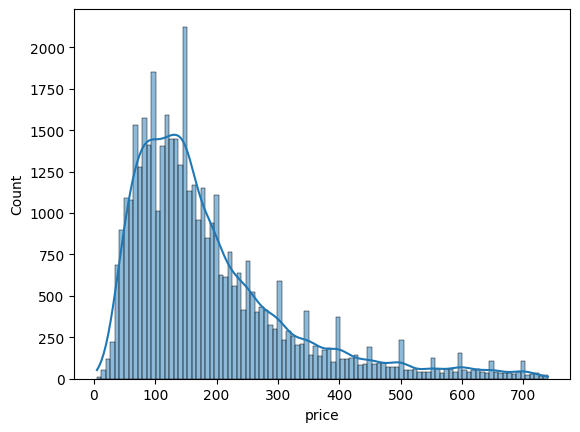

In [61]:
sns.histplot(data=df_precios_comunes["price"], bins=100, kde=True)

<Axes: xlabel='price', ylabel='Count'>

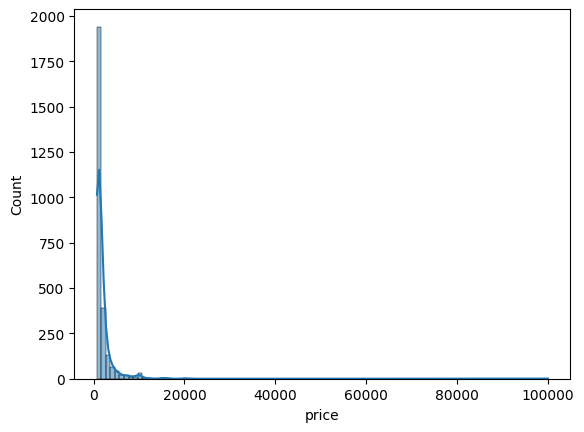

In [62]:
sns.histplot(data=df_precios_nubes["price"], bins=100, kde=True)

<Axes: xlabel='price'>

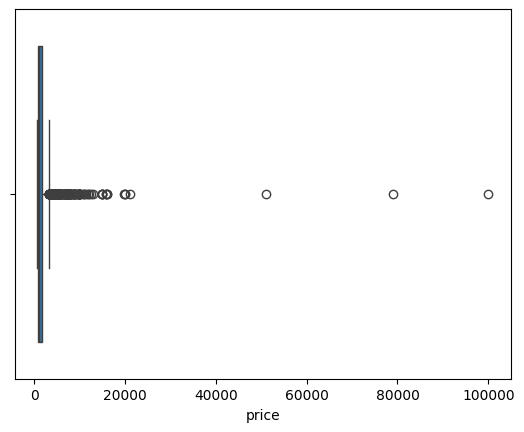

In [63]:
sns.boxplot(data=df_precios_nubes, x="price", orient="h")

Incluso dentro de los datos atípicos de price hay tanta diferencia entre los precios que hasta los valores extremadamente atípicos tienen valores extremadamente atípicos, por lo que vamos a repetir el proceso de obtención de outliers para ver a partir de qué valor de precios_nubes tenemos valores extr.atípicos y crear un subset de extremadamente extremadamente atípicos

In [64]:
Q1 = df_precios_nubes["price"].quantile(0.25)
Q3 = df_precios_nubes["price"].quantile(0.75)
IQR = Q3 - Q1
Inf = Q1 - 3*IQR
Sup = Q3 + 3*IQR

In [65]:
outliers = df_precios_nubes[(df_precios_nubes["price"] < Inf) | (df_precios_nubes["price"] > Sup)]
print(f"Columna Price Atípicos: Los valores entre el primer cuartil {Q1} y el tercer cuartil {Q3} componen el rango intercuartílico, que es de tamaño {round(IQR,1)}\nLos valores extremadamente atípicos están por debajo de {round(Inf,1)} y por encima de {round(Sup,1)}, y en esta columna hay un total de {str(len(outliers))} datos extremadamente atípicos.\n")

Columna Price Atípicos: Los valores entre el primer cuartil 900.0 y el tercer cuartil 1850.0 componen el rango intercuartílico, que es de tamaño 950.0
Los valores extremadamente atípicos están por debajo de -1950.0 y por encima de 4700.0, y en esta columna hay un total de 152 datos extremadamente atípicos.



Definiendo los valores intermedios a partir de los precios nubes con un límite superior en 4700...

In [66]:
df_precios_intermedios = df_precios_nubes[df_precios_nubes["price"] <= 4700]

y definiendo los valores gigantes a partir de ese límite de 4700...

In [67]:
df_precios_GIGANTES = df_precios_nubes[df_precios_nubes["price"]>4700]

<Axes: xlabel='price', ylabel='Count'>

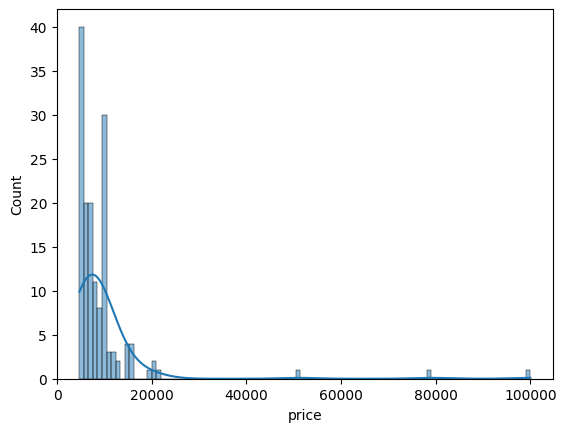

In [68]:
sns.histplot(data=df_precios_GIGANTES["price"], bins=100, kde=True)

... hemos creado 3 categorías de precios según su magnitud:

precios comunes: 0$ a 740$ incluido (Lo usual, con 42.886 obs) `common_prices` 

precios nubes (tiene atípicos) -> precios intermedios: 740$ a 4700$ incluido (Nivel elevado, con 2528 obs) `high_prices`

precios gigantes: 4700$ a 100k$ (Alto nivel, con 153 obs) `luxury_prices`

In [69]:
df_precios_comunes["price"].describe() 

count    42877.000000
mean       187.138926
std        130.929570
min          5.000000
25%         97.302326
50%        150.000000
75%        235.000000
max        740.000000
Name: price, dtype: float64

In [70]:
df_precios_intermedios["price"].describe()

count    2528.000000
mean     1413.388884
std       756.858884
min       740.079070
25%       900.000000
50%      1140.737209
75%      1631.145349
max      4700.000000
Name: price, dtype: float64

In [71]:
df_precios_GIGANTES["price"].describe()

count      152.000000
mean      9596.677632
std      10505.478319
min       4713.000000
25%       5595.250000
50%       7500.000000
75%      10000.000000
max      99999.000000
Name: price, dtype: float64

Ahora crearemos una variable llamada `price_level` que indicará con un string la categoría en la que correspondería el alojamiento según el precio que ha costado

In [72]:
df["price_level"] = pd.cut(df["price"], bins=[0, 740, 4700, 100000], labels=["Common", "High", "Luxury"])

Esta variable puede ser útil para encasillar o categorizar los alojamientos, tanto a nivel gráfico como para tratar de visualizarlos en un mapa

## Ver datos únicos

In [73]:
for col in df.columns:  # Para cada columna del dataframe:
    print(f"Datos únicos de la columna {col} ({len(df[col].unique())} datos distintos):") # En la columna ___ ...
    print(df[col].unique()) # ...Imprimimos los valores/categorías únicas de cada columna...
    print("\n") # ...y un espacio de línea

Datos únicos de la columna id (45557 datos distintos):
[ 969148637126091185 1084360946145463169  596292401172099914 ...
            19311232            19621931  897196294114748850]


Datos únicos de la columna name (43484 datos distintos):
['Rancho Aguirre' 'Huge guest house private room' 'The Big Kahuna' ...
 'Renovated Silver Lake House with Private Backyard'
 'Silver Lake Mid-century Nestled in the Treetops'
 'Stunning 4bd/4bth Close to Beach']


Datos únicos de la columna host_id (23016 datos distintos):
[534598147  82025876   7858796 ... 127587231  20666178 135244376]


Datos únicos de la columna host_name (8468 datos distintos):
['Ferdy' 'Shou' 'Pamela' ... 'Searcy' 'Colin And Christie' 'Maddalena']


Datos únicos de la columna neighbourhood_group (3 datos distintos):
['Unincorporated Areas' 'Other Cities' 'City of Los Angeles']


Datos únicos de la columna neighbourhood (266 datos distintos):
['Lake Los Angeles' 'Torrance' 'Malibu' 'Pacoima' 'Pasadena' 'Topanga'
 'South San Gab

## Clasificación de variables

In [74]:
# Sacamos los nombres de las columnas numéricas y categóricas
def tipo_de_columnas_ordenadas (df2):
    string = []
    num_int = []
    num_float = []
    date = []
    category = []
    boolean = []

    for col in df2.columns:
        if(df2[col].dtype == "object"):
            string.append(col)
        elif(df2[col].dtype == "int64"):
            num_int.append(col)
        elif(df2[col].dtype == "datetime64[ns]"):
            date.append(col)
        elif(df2[col].dtype == "float64"):
            num_float.append(col)
        elif(df2[col].dtype == "bool"):
            boolean.append(col)
        else:
            category.append(col)

    return string , num_int, num_float, date, category, boolean

string , num_int, num_float, date, category, boolean = tipo_de_columnas_ordenadas(df)
print(f"Tenemos {len(string)} variables atributo o strings, que son: ", string)
print(f"Tenemos {len(num_int)} variables numéricas con números enteros, que son: ", num_int)
print(f"Tenemos {len(num_float)} variables numéricas con decimales, que son: ", num_float)
print(f"Tenemos {len(date)} variables en formato fecha, que son: ", date)
print(f"Tenemos {len(category)} variables categóricas, que son: ", category)
print(f"Tenemos {len(boolean)} variables booleanas, que son: ", boolean)

Tenemos 7 variables atributo o strings, que son:  ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'license', 'amenities']
Tenemos 12 variables numéricas con números enteros, que son:  ['id', 'host_id', 'minimum_nights', 'number_of_reviews', 'host_count', 'availability_365', 'number_of_reviews_ltm', 'bathrooms', 'bedrooms', 'beds', 'accommodates', 'amenities_count']
Tenemos 7 variables numéricas con decimales, que son:  ['latitude', 'longitude', 'price', 'reviews_per_month', 'review_scores_rating', 'antiguedad', 'antiguedad_ex']
Tenemos 2 variables en formato fecha, que son:  ['last_review', 'first_review']
Tenemos 2 variables categóricas, que son:  ['landlord_size', 'price_level']
Tenemos 2 variables booleanas, que son:  ['has_pet', 'has_security_cams']


In [75]:
df.to_csv("LA_clean.csv", index=False)

# Variables

## Comprobación de la Normalidad (o no normalidad) de nuestras variables

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables



 mu = 442507441829972928.00 and sigma = 450930569483117632.00



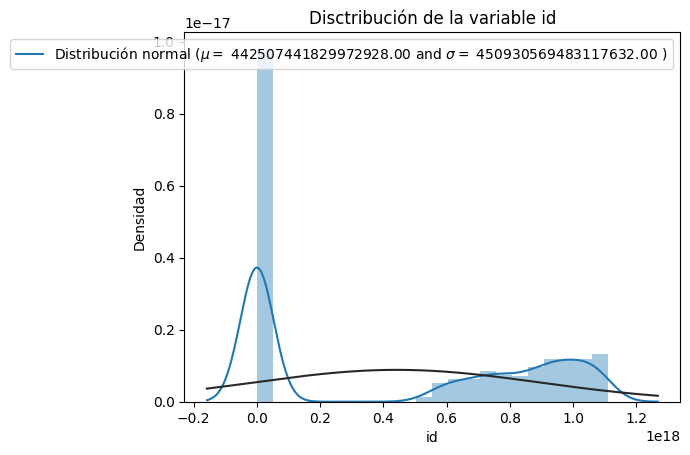

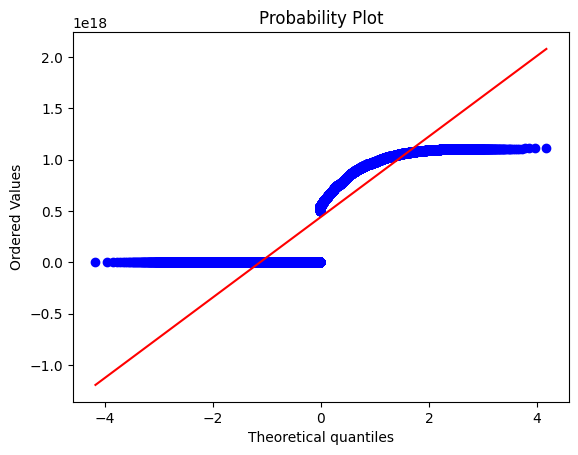

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables



 mu = 186815197.25 and sigma = 180544152.42



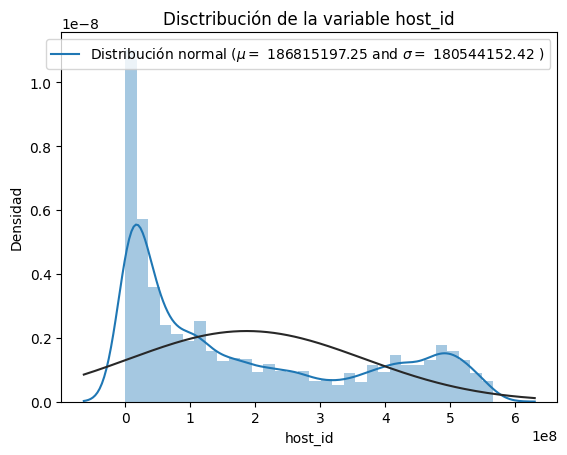

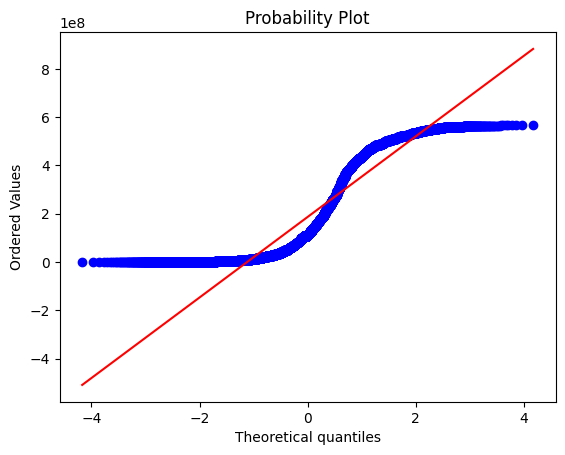

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables



 mu = 34.06 and sigma = 0.14



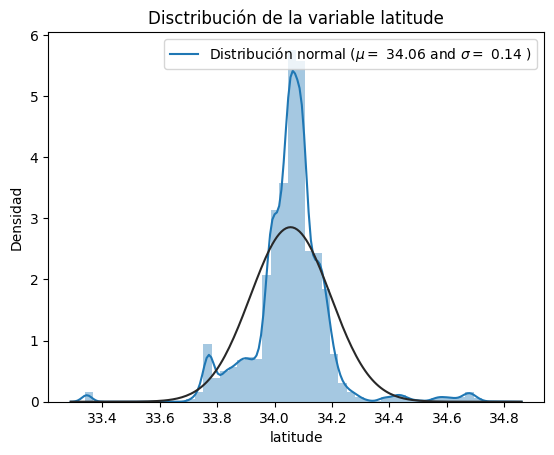

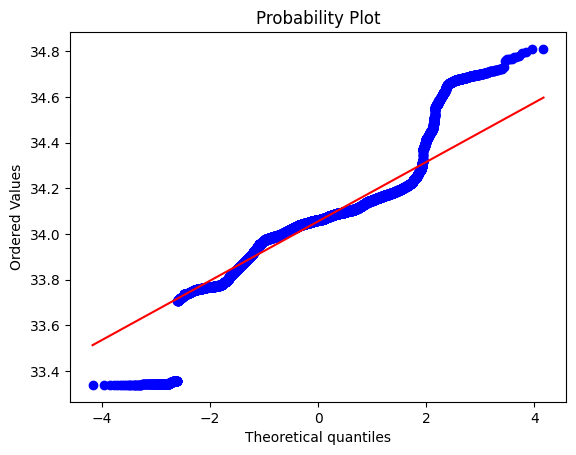

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables



 mu = -118.31 and sigma = 0.17



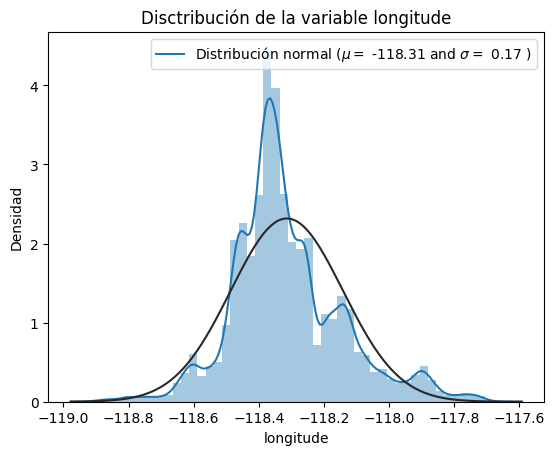

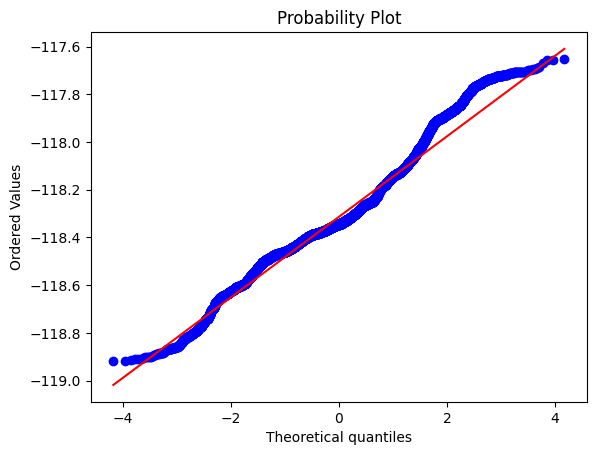


 mu = 286.58 and sigma = 884.69



C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables


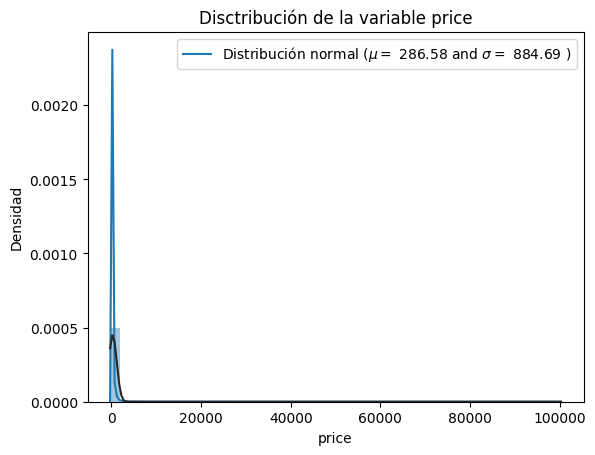

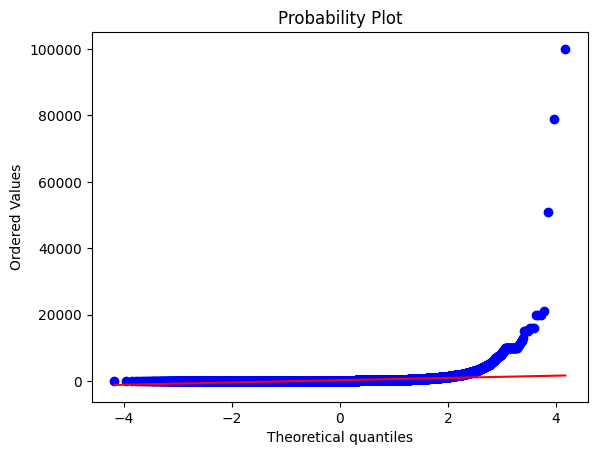


 mu = 17.84 and sigma = 28.13



C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables


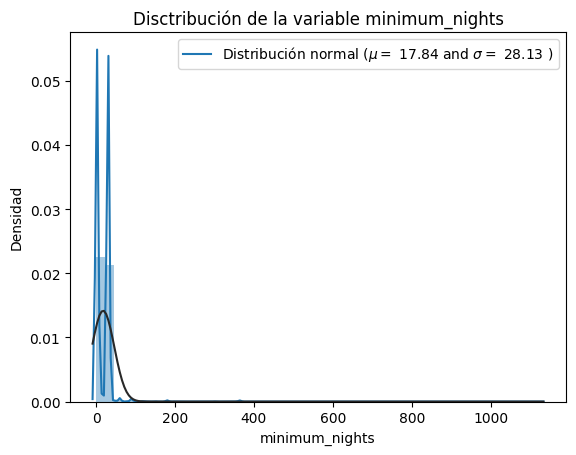

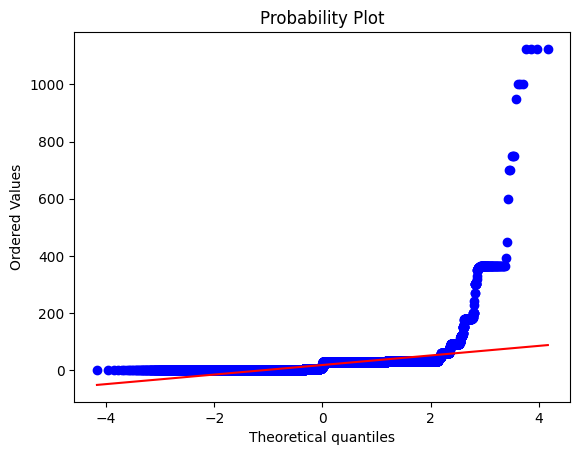


 mu = 34.89 and sigma = 77.69



C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables


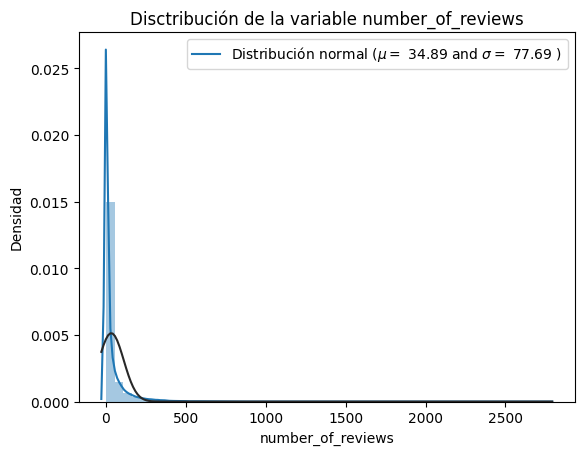

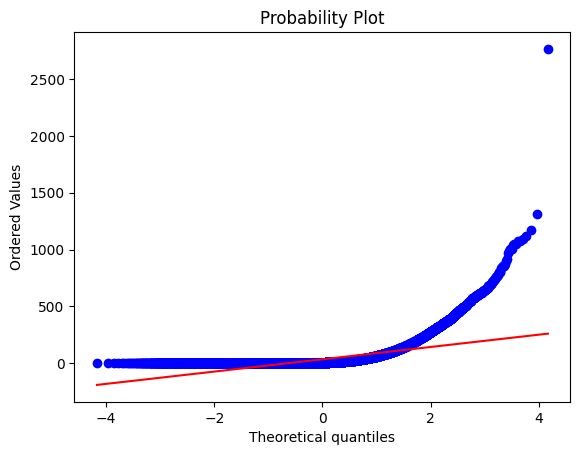

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables
C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col


 mu = 24.10 and sigma = 93.71



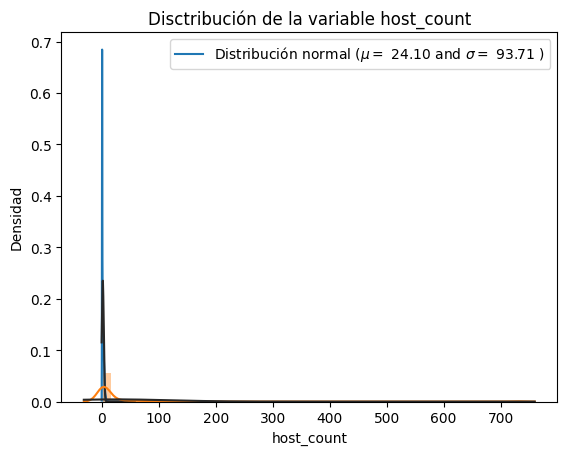

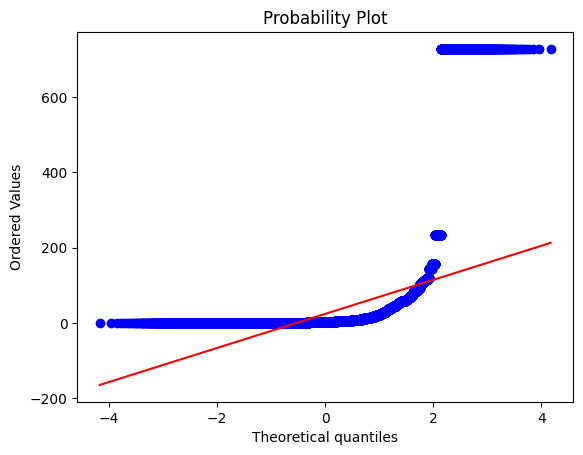

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables



 mu = 178.08 and sigma = 138.42



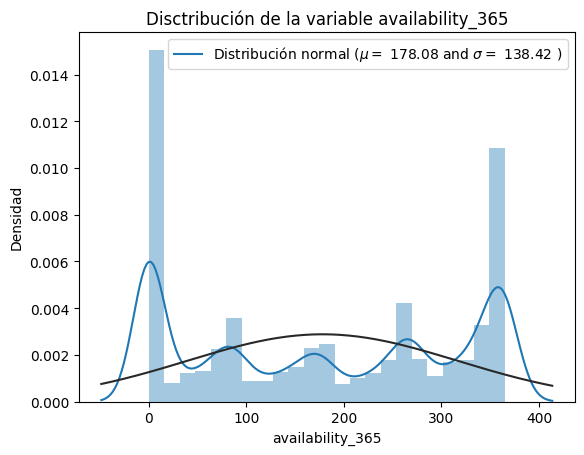

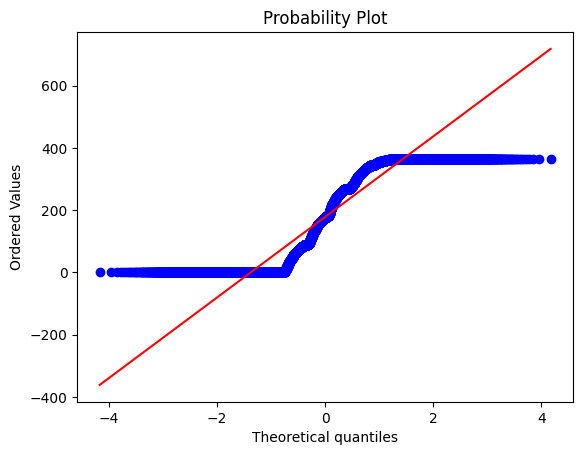

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables



 mu = 8.43 and sigma = 16.68



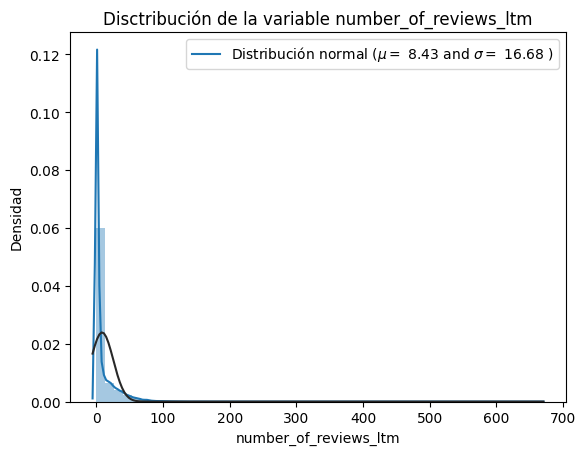

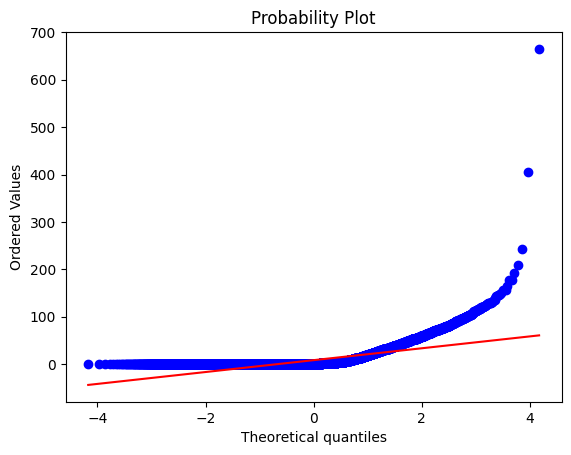


 mu = 1.59 and sigma = 1.18



C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables


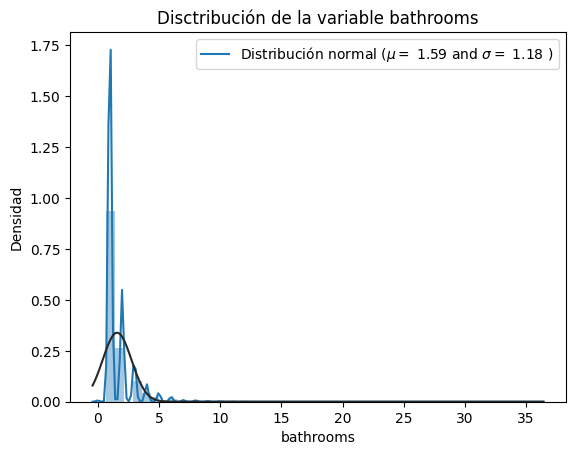

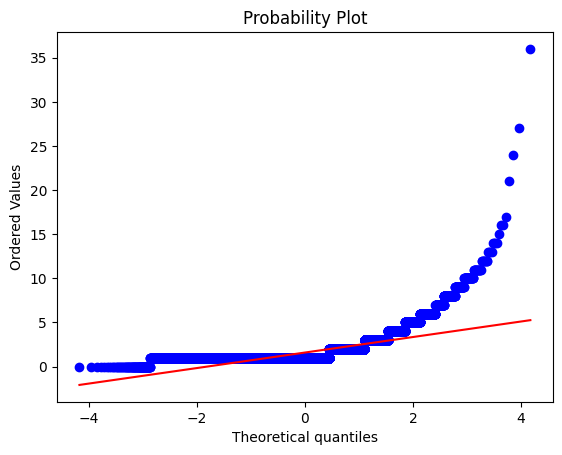


 mu = 1.73 and sigma = 1.29



C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables


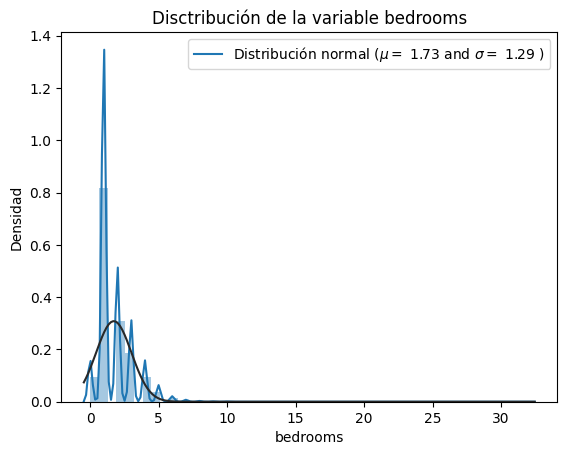

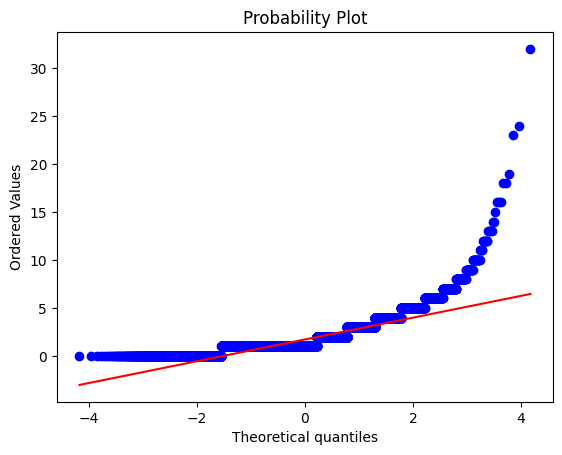


 mu = 2.18 and sigma = 1.58



C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables


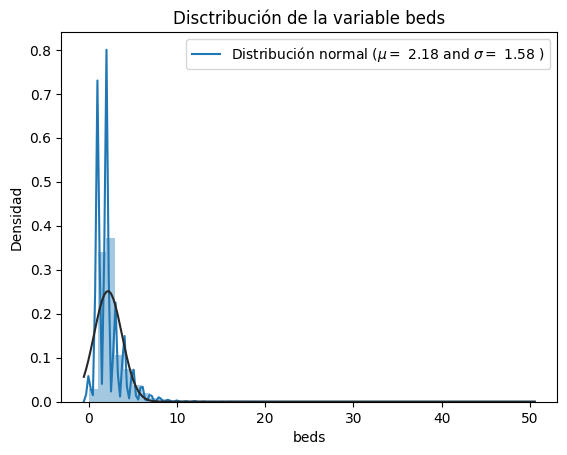

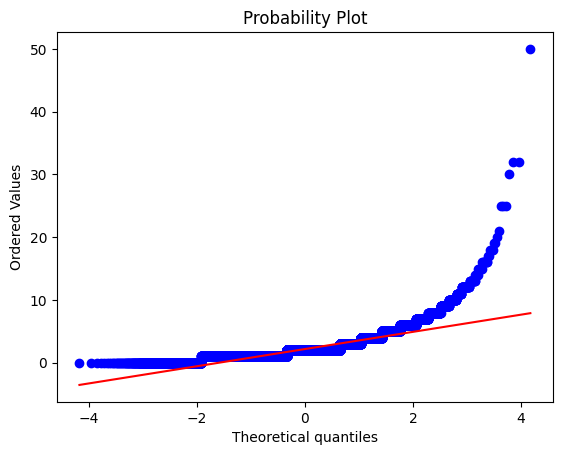

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables



 mu = 4.02 and sigma = 2.87



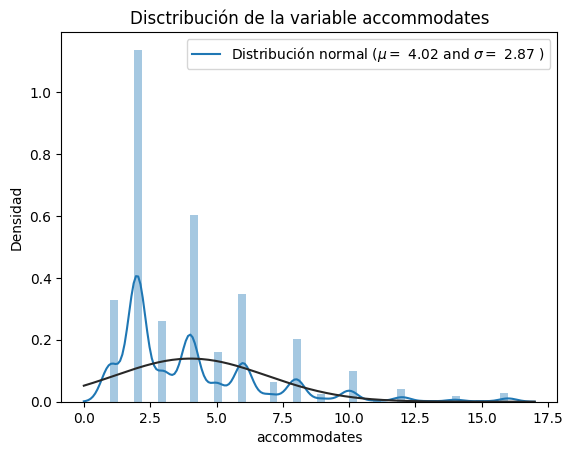

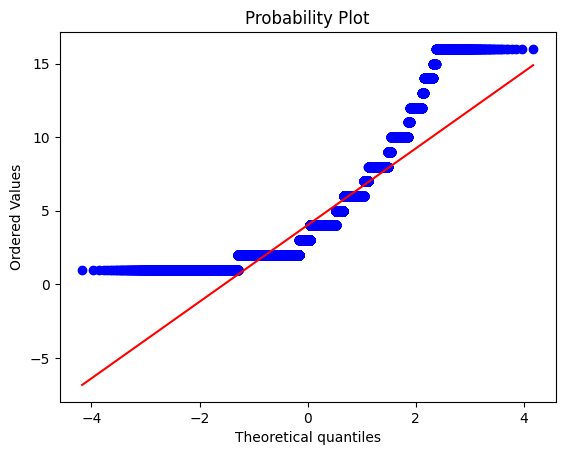

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables
C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col


 mu = 36.63 and sigma = 18.98



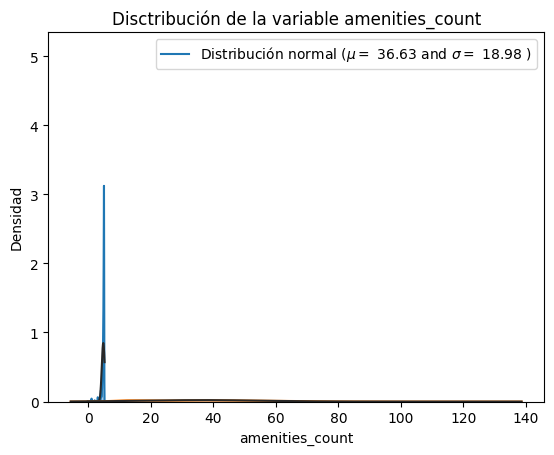

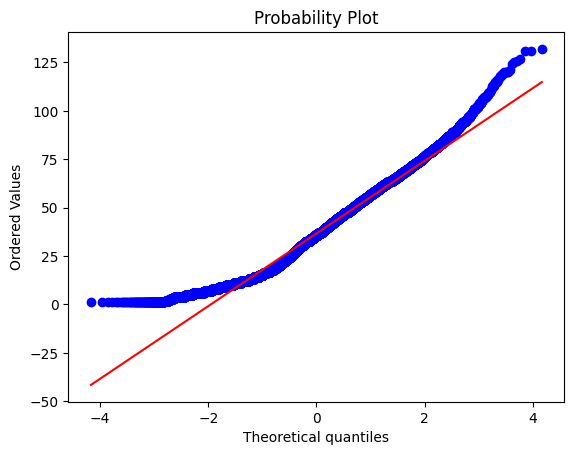

C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables
C:\Users\Usuario\AppData\Local\Temp\ipykernel_141056\4199456206.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col

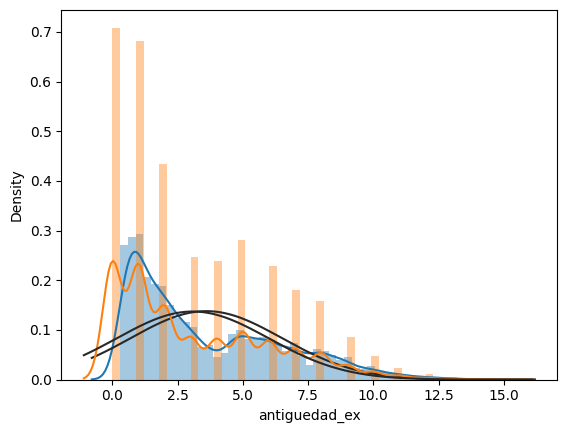

In [76]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

#Para cada variable queremos ver su distribución y QQ-plot
for col in df.select_dtypes(include=[np.number]).columns:
    try:
        sns.distplot(df[col] , fit=stats.norm); #Distribución de las variables

        # Obtén los parámetros ajustados
        (mu, sigma) = stats.norm.fit(df[col])
        print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

        #Now plot the distribution
        plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
        plt.ylabel('Densidad')
        plt.title(f'Disctribución de la variable {col}')

        #Mostramos QQ-plot
        fig = plt.figure()
        res = stats.probplot(df[col], plot=plt)
        plt.show()
    except:
        pass

Como vemos, la mayoría de datos no siguen una distribución normal, por lo que en caso de querer aplicar correlaciones, deberíamos usar Spearman

## Correlaciones

In [77]:
# Método de Spearman (Mide una dependencia no paramétrica y monotónica entre variables) 
correlacion_spearman = df.corr(method='spearman')
plt.figure(figsize=(20, 16))
sns.heatmap(correlacion_spearman, vmax=1, vmin=-1, annot=True, square=True, linewidths=0.2, cmap='coolwarm', linecolor='grey')
plt.title('Mapa de Calor de la correlacion_spearman')
plt.show()

ValueError: could not convert string to float: 'Rancho Aguirre'

# Análisis Gráfico del DataSet

# Análisis Estadístico del Dataset

Test de Shapiro

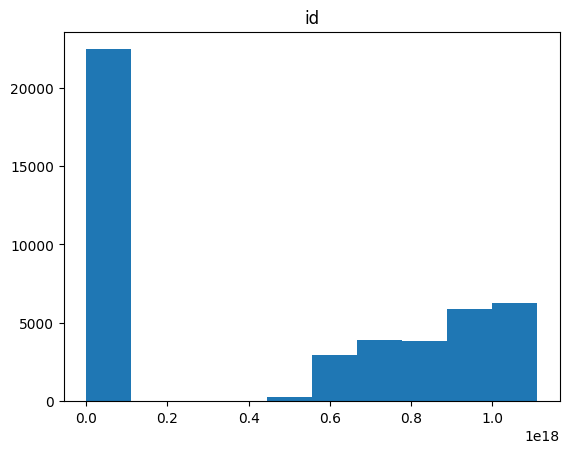

Estadístico=0.7589580227891546, p-value=4.827998906816049e-118
La variable id no sigue una distribución normal


C:\Users\juanv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45557.
  res = hypotest_fun_out(*samples, **kwds)


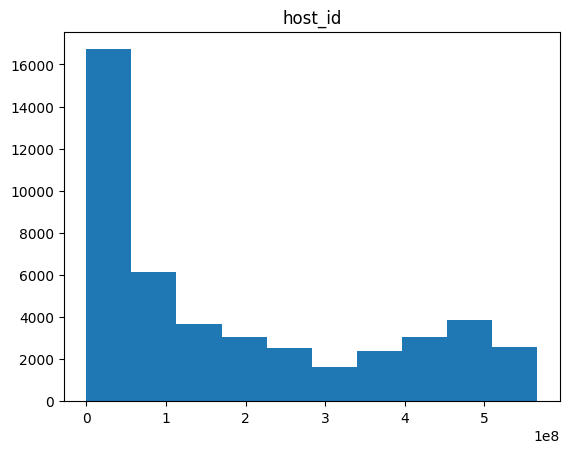

Estadístico=0.8543704973878752, p-value=1.8480813741330628e-104
La variable host_id no sigue una distribución normal


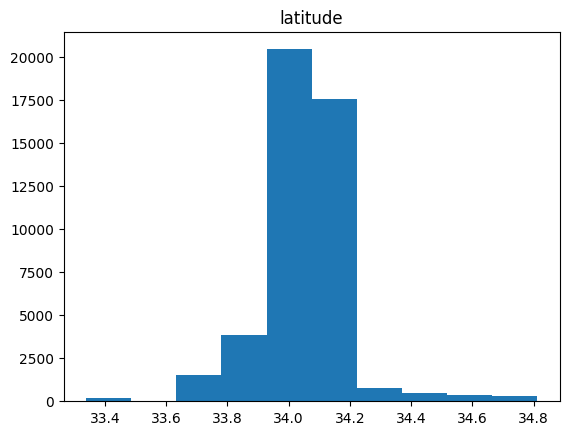

Estadístico=0.8662871551410962, p-value=3.0503192766016812e-102
La variable latitude no sigue una distribución normal


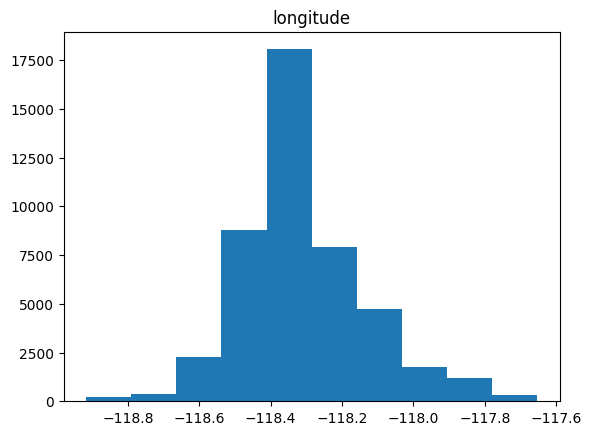

Estadístico=0.9618187445366712, p-value=1.798089135870364e-72
La variable longitude no sigue una distribución normal


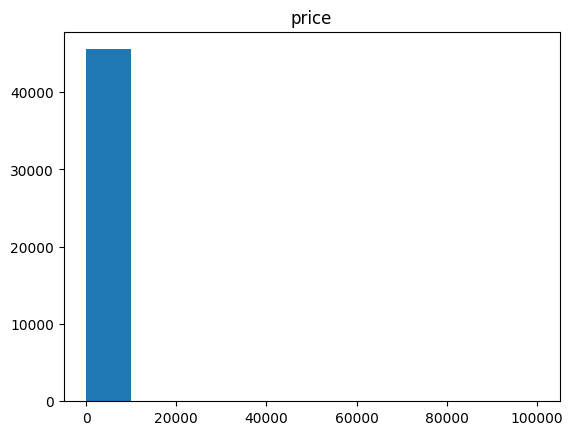

Estadístico=0.1487351793296846, p-value=9.335755679008429e-156
La variable price no sigue una distribución normal


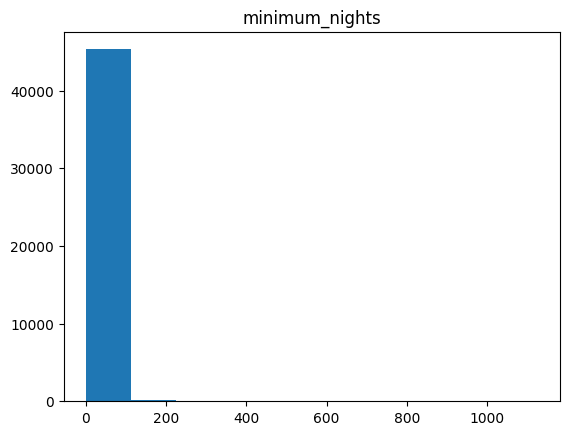

Estadístico=0.3536213401782883, p-value=4.4816735097644346e-147
La variable minimum_nights no sigue una distribución normal


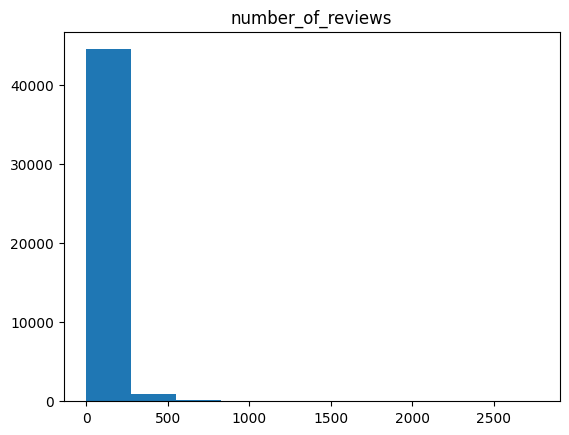

Estadístico=0.4848918729825995, p-value=4.1624775976969037e-140
La variable number_of_reviews no sigue una distribución normal


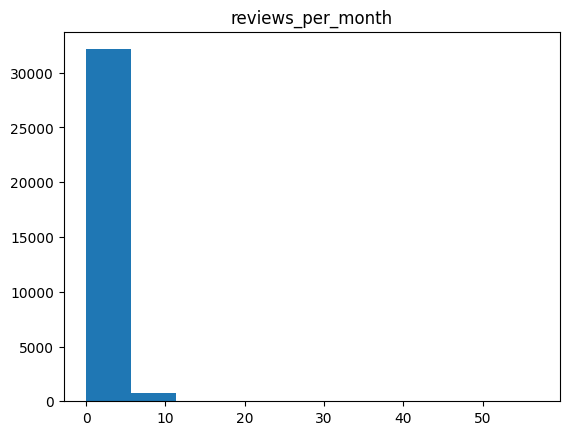

Estadístico=nan, p-value=nan
La variable reviews_per_month sigue una distribución normal


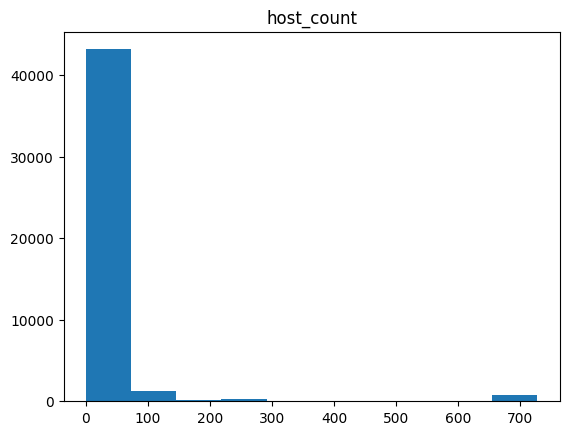

Estadístico=0.23256815795555486, p-value=1.8557729016110571e-152
La variable host_count no sigue una distribución normal


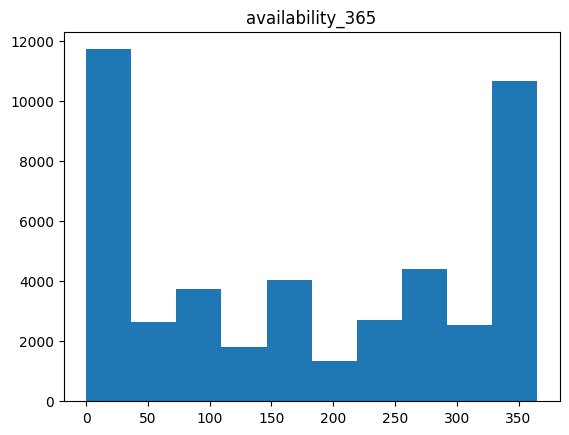

Estadístico=0.8728417645846851, p-value=6.006835691202862e-101
La variable availability_365 no sigue una distribución normal


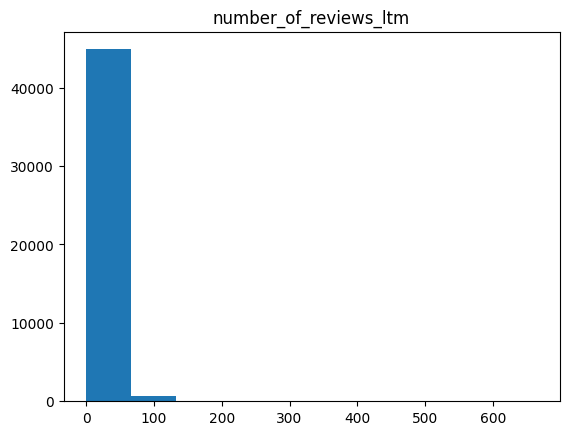

Estadístico=0.5646822467784648, p-value=4.727748247442724e-135
La variable number_of_reviews_ltm no sigue una distribución normal


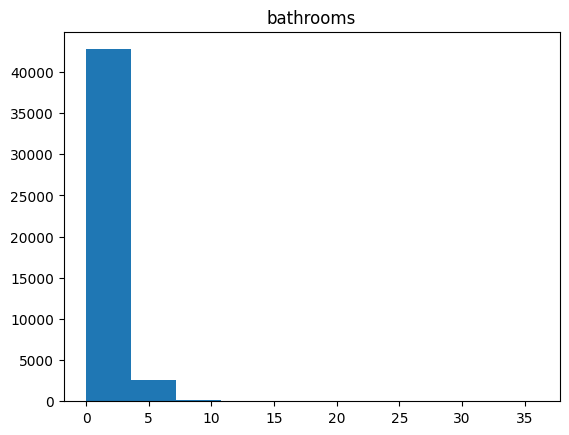

Estadístico=0.5608122186777166, p-value=2.577179093886241e-135
La variable bathrooms no sigue una distribución normal


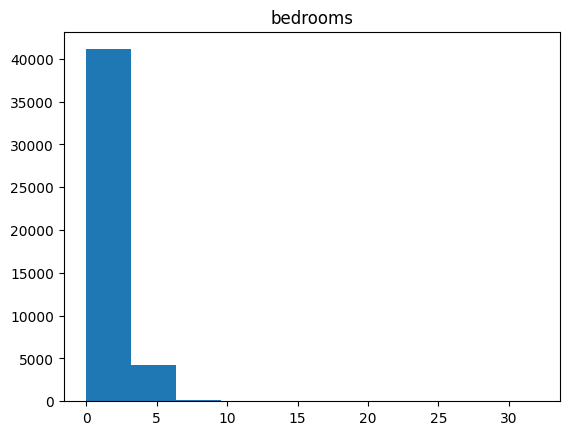

Estadístico=0.7703662302930302, p-value=1.0651236881311582e-116
La variable bedrooms no sigue una distribución normal


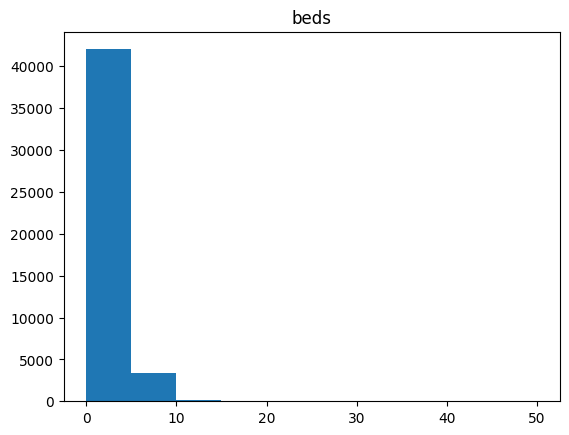

Estadístico=0.7482651359509409, p-value=2.9804726735423444e-119
La variable beds no sigue una distribución normal


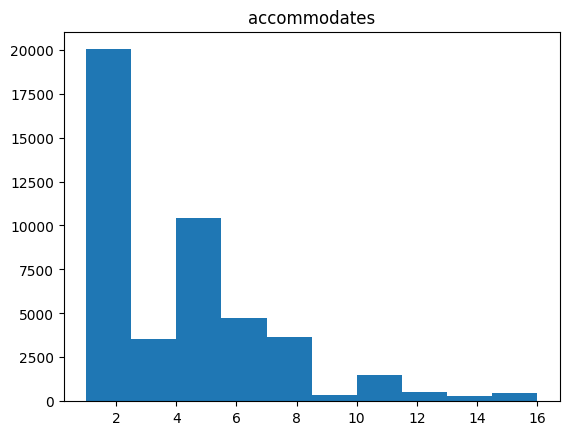

Estadístico=0.8269265864004444, p-value=5.103916537311268e-109
La variable accommodates no sigue una distribución normal


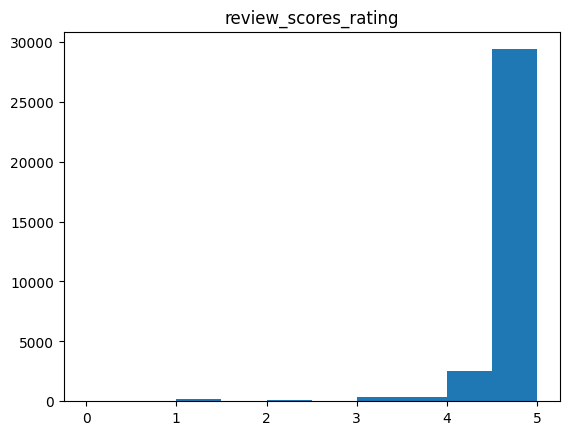

Estadístico=nan, p-value=nan
La variable review_scores_rating sigue una distribución normal


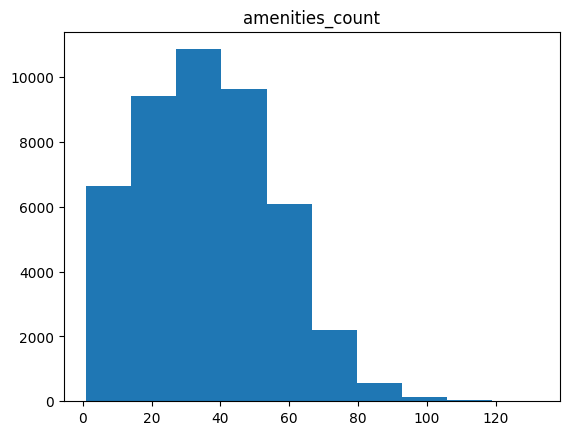

Estadístico=0.9762093349290875, p-value=1.365285368626869e-62
La variable amenities_count no sigue una distribución normal


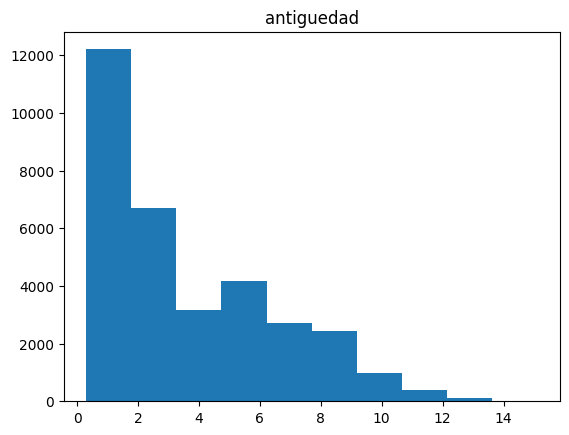

Estadístico=nan, p-value=nan
La variable antiguedad sigue una distribución normal


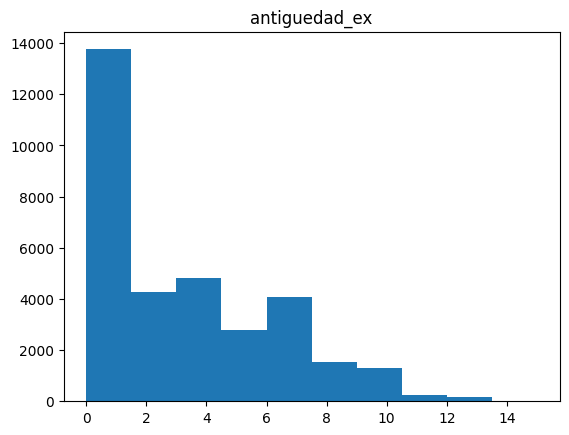

Estadístico=nan, p-value=nan
La variable antiguedad_ex sigue una distribución normal


In [ ]:
#COMPROBAMOS EL TIPO DE DISRIBUCIÓN DE CADA VARIABLE NUMÉRICA MEDIANTE UN HISTOGRAMA Y UN TEST DE SHAPIRO-WILK
from scipy.stats import shapiro

for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.hist(df[columna])
    plt.title(columna)
    plt.show()
    stat, p = shapiro(df[columna])
    print(f'Estadístico={stat}, p-value={p}')
    if p < 0.05:
        print(f'La variable {columna} no sigue una distribución normal')
    else:
        print(f'La variable {columna} sigue una distribución normal')

# SI EL P-VALUE ES MENOR QUE 0.05 NO SIGUE UNA DISTRIBUCIÓN NORMAL

In [ ]:
stat, p = shapiro(df_precios_GIGANTES["price"])
print(f'Estadístico={stat}, p-value={p}')

if p < 0.05:
    print(f'La variable no sigue una distribución normal')
else:
    print(f'La variable sigue una distribución normal')

Estadístico=0.35052349470284916, p-value=3.872960023193194e-23
La variable no sigue una distribución normal


Test con T-Student

In [ ]:
ds1 = ds["Age"][ds["Pclass"] == 1] # Poner los ds que correspondan, yo lo escribo para que no aparezca error
ds2 = ds["Age"][ds["Pclass"] != 1]

t_stats, p_value = stats.ttest_ind(ds1, ds2)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los niños de primera clase tenían la misma ratio de superv. que los demás niños')
else:
    print('No Rechazamos la hipótesis nula de que los niños de primera clase tenían la misma ratio de superv. que los demás niños')

NameError: name 'ds' is not defined

Test con Chi-Cuadrado

In [ ]:
contingency_table = pd.crosstab(ds['survived'], ds['alone'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que la tasa de supervivencia de personas solitarios es la misma')
else:
    print('No podemos rechazar la hipótesis nula de que la tasa de supervivencia de personas solitarios es la misma')

# Fin del documento

In [81]:

fig = pxp.histogram(df, x='neighbourhood_group', text_auto=True,
                  title='Conteo de IDs por Vecindario',
                 labels={'neighbourhood_group': 'Vecindario'},
                  color='neighbourhood_group')
 
# Mostrar la gráfica
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed